In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost xgboost imbalanced-learn lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 18 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import warnings
import os
import random
from IPython.display import display
from matplotlib import pyplot
from pylab import rcParams
import math
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import lightgbm
from sklearn.preprocessing import MinMaxScaler, minmax_scale, power_transform

rcParams['figure.figsize'] = 25, 15

warnings.filterwarnings('ignore')
SEED = 1001
PATH = '/content/drive/MyDrive/Zindi_Challenge/data/'

def set_seed(seeed):
    os.environ['PYTHONHASHSEED'] = str(seeed)
    np.random.seed(seeed)
    random.seed(seeed)

set_seed(SEED)

# Data

In [ ]:
CompetitionParticipation = pd.read_csv(PATH + "CompetitionPartipation.csv").drop_duplicates()
UserActivity = pd.read_csv(PATH + "UserActivity.csv").drop_duplicates()
Competition = pd.read_csv(PATH + "Competition.csv").drop_duplicates()
Blogs = pd.read_csv(PATH + "Blogs.csv").drop_duplicates()
SampleSubmission = pd.read_csv(PATH + "SampleSubmission.csv").drop_duplicates()
VariableDefinitions = pd.read_csv(PATH + "VariableDefinitions.csv").drop_duplicates()
Users = pd.read_csv(PATH + "Users.csv").drop_duplicates()
Discussion = pd.read_csv(PATH + "Discussion.csv").drop_duplicates()
Jobs = pd.read_csv(PATH + "Jobs.csv").drop_duplicates()
Comments = pd.read_csv(PATH + "Comments.csv").drop_duplicates()

CompetitionParticipation.columns = CompetitionParticipation.columns.str.replace(' ', '_')
UserActivity.columns = UserActivity.columns.str.replace(' ', '_')
Competition.columns = Competition.columns.str.replace(' ', '_')
Blogs.columns = Blogs.columns.str.replace(' ', '_')
SampleSubmission.columns = SampleSubmission.columns.str.replace(' ', '_')
Users.columns = Users.columns.str.replace(' ', '_')
Discussion.columns = Discussion.columns.str.replace(' ', '_')
Jobs.columns = Jobs.columns.str.replace(' ', '_')
Comments.columns = Comments.columns.str.replace(' ', '_')

In [ ]:
all_user_ids = Users['User_ID'].unique()

print("all_user_ids length", len(all_user_ids))

all_user_ids

all_user_ids length 12413


array(['ID_DC6S4E9O', 'ID_E8S97OUT', 'ID_QZ1HASL3', ..., 'ID_RGN2RK66',
       'ID_XZS1QE0W', 'ID_8K4FGJYO'], dtype=object)

In [ ]:
activities_user_ids = UserActivity['User_ID'].unique()

print("activities_user_ids length", len(activities_user_ids))

activities_user_ids

activities_user_ids length 10400


array(['ID_RT43AK77', 'ID_ZX1PC359', 'ID_K3SE1II1', ..., 'ID_H9HOYH8O',
       'ID_VB6LHFJ0', 'ID_P3CVTPGE'], dtype=object)

In [ ]:
for activity_user_id in activities_user_ids:
  if activity_user_id not in all_user_ids:
    print(activity_user_id)

In [ ]:
discussions_user_ids = Discussion['User_ID'].unique()

print("discussions_user_ids length", len(discussions_user_ids))

discussions_user_ids

discussions_user_ids length 1017


array(['ID_AAGFVLHH', 'ID_0AJGQILU', 'ID_U90KK6KL', ..., 'ID_3NL0QLE6',
       'ID_3PL1LQQX', 'ID_S4XIIL0Z'], dtype=object)

In [ ]:
for discussion_user_id in discussions_user_ids:
  if discussion_user_id not in all_user_ids:
    print(discussion_user_id)

In [ ]:
participation_user_ids = CompetitionParticipation['User_ID'].unique()

print("participation_user_ids length", len(participation_user_ids))

participation_user_ids

participation_user_ids length 5245


array(['ID_40G01FGV', 'ID_P33ABQX5', 'ID_370J8DHN', ..., 'ID_M8FQBYIH',
       'ID_9IP2OICN', 'ID_JUE09Z86'], dtype=object)

In [ ]:
for participation_user_id in participation_user_ids:
  if participation_user_id not in all_user_ids:
    print(participation_user_id)

In [ ]:
comment_user_ids = Comments['User_ID'].unique()

print("comment_user_ids length", len(comment_user_ids))

comment_user_ids

comment_user_ids length 192


array(['ID_CEDNKSVV', 'ID_Q0AI5FV5', 'ID_SSE2SXWF', 'ID_0RJ4YV3T',
       'ID_SZY7UVP1', 'ID_ECRC1HNG', 'ID_KAEOWOIU', 'ID_BGDI18Y9',
       'ID_PG64ZY18', 'ID_E7SKL6R4', 'ID_ZUYKQ8J0', 'ID_ZD20NJFA',
       'ID_WLSYFWFE', 'ID_I4BH68MU', 'ID_EUVUFI8H', 'ID_LAX472KM',
       'ID_JNZQMMX0', 'ID_H0IR2B9W', 'ID_YKNL8WNI', 'ID_ZHR6NCSJ',
       'ID_FU9487VT', 'ID_EF5JPUZW', 'ID_PCOK6YYS', 'ID_UCH8W041',
       'ID_JLAA97OM', 'ID_A8HP1ANN', 'ID_GUHCJ3WZ', 'ID_2BKRRSKW',
       'ID_PQG4U6Z9', 'ID_HA5GD0UH', 'ID_3GVBNS1Y', 'ID_VHKMHN5V',
       'ID_2OK0YBNF', 'ID_YKMUQUT0', 'ID_G23UREIF', 'ID_MW1RUXWJ',
       'ID_TQMLT2YD', 'ID_ZDAVDH08', 'ID_98KP92NY', 'ID_O2NYGOCI',
       'ID_KBHUGA7D', 'ID_UGSSHS8M', 'ID_GKRH4XL7', 'ID_L3SE5MXW',
       'ID_HC4BEZD4', 'ID_D96RNL1K', 'ID_PROILWVY', 'ID_6FWB89V7',
       'ID_0SXRNUSA', 'ID_50JC7HOA', 'ID_45DGPFGT', 'ID_NK7LCLLL',
       'ID_TROKANDP', 'ID_ZH2JCN29', 'ID_G0CAVNIG', 'ID_FJVEPK9I',
       'ID_OAT2Z0FH', 'ID_AC8HAGSZ', 'ID_A47F76VX', 'ID_TRKNIR

In [ ]:
for comment_user_id in comment_user_ids:
  if comment_user_id not in all_user_ids:
    print(comment_user_id)

# Functions

In [ ]:
def remove_id(x):
  x = x.replace('$', '')

  if 'ID' in x:
    return "_".join(x.split('_')[:-1])

  return x.replace(' ', '_')

def set_count(x):
  if x is None:
    return None

  if 'count' in str(x):
    return int(x.split(" ")[1])

  return 0

def count_remaining_days(registered_day, registered_month):
  max_days = {8: 31, 9: 29,10: 31 ,11: 30, 12: 31, 1:30, 2: 31,3: 31,4: 30, 5: 31, 6: 30, 7: 31}

  total_days = max_days[registered_month] - registered_day

  return total_days if total_days > 0 else 1

def count_remaining_weeks(registered_day, registered_month):
  max_days = {8: 31, 9: 29,10: 31 ,11: 30, 12: 31, 1:30, 2: 31,3: 31,4: 30, 5: 31, 6: 30, 7: 31}

  total_weeks = int(math.floor((max_days[registered_month] - registered_day) / 7))

  return total_weeks if total_weeks > 0 else 1

def round_decimal(x):
  if math.isinf(x) or pd.isnull(x):
    return 0

  # return math.ceil(x)
  return x

def generate_date(year, month, day):
  year = int(year)
  month = int(month)
  day = int(day)

  if year < 2000:
    year = 2023 - 6 - year

  months_list = {8: 1, 9: 2,10: 3, 11: 4 ,12: 5 ,1: 6, 2: 7 ,3: 8 ,4: 9, 5: 10, 6: 11, 7: 12}

  month = months_list[month]

  return str(year) + "-" + str(month) + "-" + str(day)

def days_difference(date_1, date_2):

  d1 = datetime.strptime(date_1, "%Y-%m-%d")
  d2 = datetime.strptime(date_2, "%Y-%m-%d")

  # difference between dates in timedelta
  return abs((d2 - d1).days)

def weeks_difference(date_1, date_2):

  d1 = datetime.strptime(date_1, "%Y-%m-%d")
  d2 = datetime.strptime(date_2, "%Y-%m-%d")

  weeks = int(abs((d2 - d1).days) / 7 / 4)

  # difference between dates in timedelta
  return weeks if weeks > 0 else 1

def get_week(date):
  day_of_month = datetime.strptime(date, "%Y-%m-%d").day

  return (day_of_month - 1) // 7 + 1

def check_ongoing(end_time_month, sign_up_month, end_time_year):
  months_order = [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]

  if pd.isnull(end_time_month) or pd.isnull(end_time_year):
    return 0

  return 1 if (months_order.index(end_time_month) + 1 < len(months_order) and end_time_month > sign_up_month) or end_time_year > 1 else 0

def remove_brackets(feature):
  feature = str(feature)

  if feature == "[]":
    return None

  if "[" in feature and "]" in feature:
    feature = feature.replace("[", "")
    feature = feature.replace("]", "")

  if ", " in feature:
    feature = feature.replace(", ", "_")

  return feature

In [ ]:
Competition

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End_Time_time,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Start_Time_time,Start_Time_Year,Start_Time_Month,Start_Time_Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_A2FN,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
4,[],[6],NaN,0,2,0,[],[4],[2],9.0,NaN,ID_X0PD,23:59:00,2.0,5.0,31.0,09:00:00,2,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,[],[],NaN,1,2,0,[2],[5],[2],NaN,NaN,ID_GR92,15:00:00,1.0,2.0,1.0,05:00:00,1,1,1
243,[1],[],2.0,1,2,0,[1],[5],[1],2.0,NaN,ID_8BH9,23:59:00,1.0,6.0,27.0,15:00:00,1,6,1
244,[1],[],NaN,0,2,1,[1],[3],[],NaN,H03V,ID_IHRZ,17:00:00,1.0,10.0,20.0,08:57:00,1,10,19
245,[1],[],25.0,0,2,1,[1],[5],[2],NaN,EGI9,ID_CMWO,12:00:00,1.0,5.0,31.0,12:00:00,1,5,1


In [ ]:
Competition['SecretCode'].value_counts()

0    140
1    107
Name: SecretCode, dtype: int64

In [ ]:
# CompetitionFeatures = Competition.drop(columns=['Country_ID', 'End_Time_time', 'End_Time_Year', 'End_Time_Year', 'End_Time_Month', 'End_Time_Day_of_month', 'Start_Time_time', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Day_of_month'])
CompetitionFeatures = Competition.drop(columns=['End_Time_time', 'End_Time_Year', 'End_Time_Year', 'End_Time_Month', 'End_Time_Day_of_month', 'Start_Time_time', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Day_of_month'])

le = LabelEncoder()

CompetitionFeatures.Country_ID = CompetitionFeatures.Country_ID.fillna('unspecified')
CompetitionFeatures.Country_ID = le.fit_transform(CompetitionFeatures.Country_ID)

CompetitionFeatures = CompetitionFeatures.fillna(-1)

CompetitionFeatures['FeatureA'] = CompetitionFeatures['FeatureA'].apply(remove_brackets)
CompetitionFeatures['FeatureB'] = CompetitionFeatures['FeatureB'].apply(remove_brackets)
CompetitionFeatures['FeatureF'] = CompetitionFeatures['FeatureF'].apply(remove_brackets)
CompetitionFeatures['FeatureG'] = CompetitionFeatures['FeatureG'].apply(remove_brackets)
CompetitionFeatures['FeatureH'] = CompetitionFeatures['FeatureH'].apply(remove_brackets)

CompetitionFeatures['FeatureI'] = CompetitionFeatures['FeatureI'].astype(int)

CompetitionFeatures['FeatureI'] = CompetitionFeatures['FeatureI'].apply(remove_brackets)

CompetitionFeatures = CompetitionFeatures.fillna(-1)

CompetitionFeatures['FeatureC'] = CompetitionFeatures['FeatureC'].astype(int)

# CompetitionFeatures = pd.get_dummies(CompetitionFeatures, columns=['FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'FeatureH', 'FeatureI'], drop_first=False)

CompetitionFeatures = pd.get_dummies(CompetitionFeatures, columns=['FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'FeatureH', 'FeatureI', 'Country_ID'], drop_first=False)

CompetitionFeatures = CompetitionFeatures.rename(columns={'Comp_ID': 'Competition_ID'})

CompetitionFeatures

,SecretCode,Competition_ID,FeatureA_-1,FeatureA_1,FeatureA_1_3,FeatureA_1_4_5,FeatureA_1_5_4,FeatureA_1_6,FeatureA_1_7,FeatureA_1_9,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,1,ID_AU0T,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,ID_O21T,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,ID_W6XE,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,ID_A2FN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,ID_X0PD,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,ID_GR92,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
243,0,ID_8BH9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
244,1,ID_IHRZ,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,1,ID_CMWO,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Users

In [ ]:
Users

,FeatureX,FeatureY,User_ID,Countries_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,7DKX,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,K4DG,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,ONON,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,3YQR,06:56:02.570173,1,5,27


In [ ]:
months = Users['Created_At_Month'].unique()

months

array([ 1, 12,  2, 11,  3,  5,  4])

In [ ]:
# signed_up_since_months = [1, 2, 3, 4, 11, 12]

signed_up_since_months = [1, 2, 3, 4, 11]

signed_up_since_months

[1, 2, 3, 4, 11]

Users that are signed up during the signed_up_since_months

In [ ]:
users_processed = Users[Users['Created_At_Month'].isin(signed_up_since_months)]
users_processed = users_processed[['User_ID', 'Created_At_Month', 'Created_At_Day_of_month']]
users_processed = users_processed.rename({'Created_At_Month': 'Signed_Up_Month', 'Created_At_Day_of_month': 'Signed_Up_Day'}, axis=1)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day
0,ID_DC6S4E9O,1,16
2,ID_QZ1HASL3,1,1
4,ID_W942LN7F,1,16
5,ID_XAXET461,2,28
6,ID_9LMT6576,2,1
...,...,...,...
12402,ID_IDVLFCHW,4,13
12404,ID_V0216AT7,11,7
12405,ID_QDL8A9FQ,4,28
12408,ID_C5393PD0,11,6


In [ ]:
users_processed['User_ID']

0        ID_DC6S4E9O
2        ID_QZ1HASL3
4        ID_W942LN7F
5        ID_XAXET461
6        ID_9LMT6576
            ...     
12402    ID_IDVLFCHW
12404    ID_V0216AT7
12405    ID_QDL8A9FQ
12408    ID_C5393PD0
12409    ID_QX7XRT0C
Name: User_ID, Length: 8426, dtype: object

In [ ]:
test_ids = SampleSubmission.User_ID_Next_month_Activity.str.replace('_Month_5', '').unique()

test_ids

array(['ID_4TOXNBGB', 'ID_CHFTIP26', 'ID_FU5GMWLQ', ..., 'ID_BB7GLV87',
       'ID_WB6O1NFS', 'ID_99LD9C1B'], dtype=object)

In [ ]:
users_with_data_count = len(UserActivity[UserActivity['User_ID'].isin(test_ids)]['User_ID'].unique())

In [ ]:
users_test_count = len(test_ids)

users_test_count

1340

In [ ]:
print("Missing user activity data", users_test_count - users_with_data_count)

Missing user activity data 602


# User Activities

In [ ]:
UserActivity

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23
...,...,...,...,...,...,...
317287,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14
317288,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14
317289,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20
317290,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14


In [ ]:
UserActivity['Title'].apply(remove_id).value_counts()

Viewed_All_Competitions                 58176
comp_ID                                 55540
Viewed_All_Discussions                  47172
Viewed_All_Learning_Pages               22930
Downloaded_Competition_Datafile         19578
Updated_Profile                         14748
Created_Submission                      13649
identify                                12339
Signed_Up                               10862
create_alias                             9346
badge_OCZE                               8864
Confirmed_Email                          8818
Updated_Discussion                       6498
Joined_Competition                       6086
Viewed_All_Jobs                          4139
Signed_In                                4100
Updated_Submission                       2929
blog_ID                                  2712
badge_HYIO                               1760
Signed_Out                               1660
job_ID                                   1492
Viewed_Discussion                 

In [ ]:
UserActivity['Title'].value_counts()

Viewed All Competitions            58176
Viewed All Discussions             47172
Viewed All Learning Pages          22930
Downloaded Competition Datafile    19578
Updated Profile                    14748
                                   ...  
comp_ID_TJK9                           1
comp_ID_TBXU                           1
blog_ID_NVX3                           1
blog_ID_R97T                           1
blog_ID_22WI                           1
Name: Title, Length: 397, dtype: int64

In [ ]:
users_sign_up_activities = UserActivity[(UserActivity['Title'] == "Signed Up") & (UserActivity['datetime_Month'].isin(signed_up_since_months))]

users_sign_up_activities

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
59114,ID_RT43AK77,Signed Up,22:00:08,1,11,22
59274,ID_AWKU4PSY,Signed Up,09:27:22,1,11,18
59280,ID_AWKU4PSY,Signed Up,09:13:49,1,11,18
59294,ID_4DEEYHWH,Signed Up,08:28:37,1,11,14
59308,ID_NXH9QGXO,Signed Up,11:03:36,1,11,15
...,...,...,...,...,...,...
281757,ID_OPHUXQXO,Signed Up,20:22:45,1,4,7
281772,ID_46DUH5D1,Signed Up,18:39:30,1,4,12
281783,ID_R7MO4D6G,Signed Up,13:12:58,1,4,5
281790,ID_368RETQ0,Signed Up,15:38:37,1,4,5


# User IDs with mismatched sign up months

In [ ]:
users_sign_up_join_unmatch = users_sign_up_activities.merge(users_processed, on='User_ID', how='left')
users_sign_up_join_unmatch = users_sign_up_join_unmatch[users_sign_up_join_unmatch['datetime_Month'] != users_sign_up_join_unmatch['Signed_Up_Month']]

mismatched_user_ids = users_sign_up_join_unmatch['User_ID'].unique()

mismatched_user_ids

array(['ID_2Z12EKYX', 'ID_CYD2ZI2R', 'ID_KANOXBWB', 'ID_QQAZEZLS',
       'ID_BR0AOHZ0', 'ID_LO8O4E7V', 'ID_0VOEDZ4X', 'ID_3XZ0HG47',
       'ID_T7ZMJ5MP', 'ID_SUMPZG2P', 'ID_V28K2G0Z', 'ID_LYQKRVUE',
       'ID_RZAIFUAJ', 'ID_SZSG2B6A', 'ID_921QFFXJ', 'ID_WU8LCUTO',
       'ID_VWRZ33SR', 'ID_G7V4QIT0', 'ID_VOUBTLGX', 'ID_CXMZA5KT',
       'ID_5QGOIVF0', 'ID_9XDLRZ8C', 'ID_CYMY3U5C', 'ID_I444JFZ1',
       'ID_SQ89OBJR', 'ID_OAQ1KBE8', 'ID_LPVR74E9', 'ID_0MMKUUB6',
       'ID_JL7RQ39H', 'ID_6HZ7HRBH', 'ID_F5W3NPO3', 'ID_4BW81X3D',
       'ID_Y3CICHKQ', 'ID_UC314AM5', 'ID_OLG9F0RW', 'ID_G0E0NTF6',
       'ID_453FQ63A', 'ID_XB4GSJ6Z', 'ID_0KNVPDPB', 'ID_JQBPS5RF',
       'ID_S5DONDET', 'ID_R1HFIJSI', 'ID_Z8QQCNFD', 'ID_WJZ31GIS',
       'ID_PNVAS0B1', 'ID_POK3ZQDU', 'ID_ILTF2JEF', 'ID_6M79FPTV',
       'ID_WZHAIOOR', 'ID_RNSWO423', 'ID_IG3UHQDY', 'ID_A9JRS7JN',
       'ID_Y9VJW8V8', 'ID_T0B5CI76', 'ID_ATVRWZ4F', 'ID_E8P45R8K',
       'ID_194QI5IR', 'ID_F4ON8KA6', 'ID_WGVZ4AY8', 'ID_EOMLYH

In [ ]:
users_sign_up_join_unmatch

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,Signed_Up_Month,Signed_Up_Day
306,ID_2Z12EKYX,Signed Up,20:12:13,1,1,20,11.0,18.0
307,ID_2Z12EKYX,Signed Up,01:42:07,1,2,14,11.0,18.0
308,ID_2Z12EKYX,Signed Up,01:45:13,1,3,17,11.0,18.0
309,ID_2Z12EKYX,Signed Up,22:13:00,1,4,14,11.0,18.0
310,ID_2Z12EKYX,Signed Up,13:23:45,1,4,10,11.0,18.0
...,...,...,...,...,...,...,...,...
6065,ID_LZ2VMSVC,Signed Up,17:25:23,1,4,10,3.0,17.0
6066,ID_LZ2VMSVC,Signed Up,17:39:13,1,4,5,3.0,17.0
6137,ID_NFU7XWTF,Signed Up,08:47:46,1,4,21,3.0,29.0
6140,ID_CRRGY91J,Signed Up,05:31:10,1,4,16,3.0,21.0


In [ ]:
UserActivity[UserActivity['User_ID'] == "ID_LZ2VMSVC"]

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
264176,ID_LZ2VMSVC,Signed Up,16:30:30,1,3,17
264177,ID_LZ2VMSVC,$create_alias,16:30:31,1,3,17
264178,ID_LZ2VMSVC,$identify,16:30:31,1,3,17
264179,ID_LZ2VMSVC,Viewed All Competitions,16:30:32,1,3,17
264180,ID_LZ2VMSVC,Viewed All Discussions,16:30:32,1,3,17
264181,ID_LZ2VMSVC,Viewed All Learning Pages,16:30:32,1,3,17
264182,ID_LZ2VMSVC,badge_OCZE,16:31:27,1,3,17
264183,ID_LZ2VMSVC,Confirmed Email,16:31:27,1,3,17
264184,ID_LZ2VMSVC,Updated Profile,17:01:52,1,3,17
264185,ID_LZ2VMSVC,Updated Profile,17:02:00,1,3,17


In [ ]:
# mismatched_user_ids = []

In [ ]:
test_ids = SampleSubmission.User_ID_Next_month_Activity.str.replace('_Month_5', '').unique()

test_ids

array(['ID_4TOXNBGB', 'ID_CHFTIP26', 'ID_FU5GMWLQ', ..., 'ID_BB7GLV87',
       'ID_WB6O1NFS', 'ID_99LD9C1B'], dtype=object)

In [ ]:
for user_id in mismatched_user_ids:
  if user_id in test_ids:
    print("Found", user_id)

Found ID_EOMLYHOK


In [ ]:
UserActivity = UserActivity[~UserActivity['User_ID'].isin(mismatched_user_ids)]

UserActivity

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23
...,...,...,...,...,...,...
317287,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14
317288,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14
317289,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20
317290,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14


In [ ]:
Users

,FeatureX,FeatureY,User_ID,Countries_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,7DKX,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,K4DG,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,ONON,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,3YQR,06:56:02.570173,1,5,27


In [ ]:
Users = Users[~Users['User_ID'].isin(mismatched_user_ids)]

Users

,FeatureX,FeatureY,User_ID,Countries_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,7DKX,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,K4DG,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,ONON,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,3YQR,06:56:02.570173,1,5,27


In [ ]:
Comments = Comments[~Comments['User_ID'].isin(mismatched_user_ids)]

Comments

,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,ID_ONQEAR,ID_CEDNKSVV,16:18:44.841697,1,5,11
1,ID_E0NHSS,ID_CEDNKSVV,17:30:40.566763,1,12,23
2,ID_3XKIOF,ID_CEDNKSVV,13:28:47.950841,1,1,3
3,ID_XCC6W4,ID_CEDNKSVV,18:42:17.362333,1,1,5
4,ID_OIGXGK,ID_CEDNKSVV,18:57:54.540062,1,12,19
...,...,...,...,...,...,...
462,ID_DK2VV3,ID_GPXBD1BG,06:11:25.314720,1,1,14
463,ID_5MJRT0,ID_2F218EUV,21:53:36.148890,1,1,15
464,ID_RMQMJA,ID_9W2RXCMI,14:06:35.178439,1,1,23
465,ID_V5431U,ID_RQEQ74SK,13:03:58.602412,1,12,29


In [ ]:
Discussion = Discussion[~Discussion['User_ID'].isin(mismatched_user_ids)]

Discussion

,Competition_ID,Personal,Theme,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,GeneralDiscussion,1,NaN,ID_0BK7TH,ID_AAGFVLHH,19:48:26.862175,1,12,27
1,GeneralDiscussion,1,NaN,ID_ZFJ9J7,ID_0AJGQILU,09:37:52.039526,1,12,20
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9
3,ID_45W9,1,NaN,ID_2BG9IX,ID_U90KK6KL,07:57:55.178845,1,2,10
4,GeneralDiscussion,1,NaN,ID_251XVV,ID_F7HIGFHQ,19:56:13.041893,1,12,27
...,...,...,...,...,...,...,...,...,...
1434,GeneralDiscussion,1,NaN,ID_09W0TZ,ID_AAJKI0P3,14:15:31.081484,1,5,23
1435,GeneralDiscussion,1,NaN,ID_613AUJ,ID_8A3X5IWU,11:06:11.201934,1,5,14
1436,GeneralDiscussion,1,NaN,ID_TCN8TB,ID_3NL0QLE6,04:57:31.578153,1,5,12
1437,GeneralDiscussion,1,NaN,ID_FTJ37Z,ID_3PL1LQQX,05:11:59.313759,1,5,9


In [ ]:
CompetitionParticipation = CompetitionParticipation[~CompetitionParticipation['User_ID'].isin(mismatched_user_ids)]

CompetitionParticipation

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20
2,ID_I9BN,1,NaN,ID_40G01FGV,12:06:55.884320,1,12,17
3,ID_PDKH,1,count 10,ID_40G01FGV,11:24:04.239058,1,12,6
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26
...,...,...,...,...,...,...,...,...
8380,ID_F7QD,1,NaN,ID_QR2HEY6L,22:10:28.532519,1,1,15
8381,ID_F7QD,1,NaN,ID_K1MDGNKE,20:54:47.902303,1,3,1
8382,ID_F7QD,1,NaN,ID_M8FQBYIH,18:57:10.479540,1,12,27
8383,ID_F7QD,1,NaN,ID_9IP2OICN,21:03:14.798218,1,12,13


In [ ]:
users_processed = Users[Users['Created_At_Month'].isin(signed_up_since_months)]
users_processed = users_processed[['User_ID', 'Created_At_Month', 'Created_At_Day_of_month']]
users_processed = users_processed.rename({'Created_At_Month': 'Signed_Up_Month', 'Created_At_Day_of_month': 'Signed_Up_Day'}, axis=1)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day
0,ID_DC6S4E9O,1,16
2,ID_QZ1HASL3,1,1
4,ID_W942LN7F,1,16
5,ID_XAXET461,2,28
6,ID_9LMT6576,2,1
...,...,...,...
12402,ID_IDVLFCHW,4,13
12404,ID_V0216AT7,11,7
12405,ID_QDL8A9FQ,4,28
12408,ID_C5393PD0,11,6


In [ ]:
users_sign_up_activities = UserActivity[(UserActivity['Title'] == "Signed Up") & (UserActivity['datetime_Month'].isin(signed_up_since_months))]

users_sign_up_activities

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
59114,ID_RT43AK77,Signed Up,22:00:08,1,11,22
59274,ID_AWKU4PSY,Signed Up,09:27:22,1,11,18
59280,ID_AWKU4PSY,Signed Up,09:13:49,1,11,18
59294,ID_4DEEYHWH,Signed Up,08:28:37,1,11,14
59308,ID_NXH9QGXO,Signed Up,11:03:36,1,11,15
...,...,...,...,...,...,...
281757,ID_OPHUXQXO,Signed Up,20:22:45,1,4,7
281772,ID_46DUH5D1,Signed Up,18:39:30,1,4,12
281783,ID_R7MO4D6G,Signed Up,13:12:58,1,4,5
281790,ID_368RETQ0,Signed Up,15:38:37,1,4,5


In [ ]:
users_sign_up_join = users_sign_up_activities.merge(users_processed, on='User_ID', how='left')
users_sign_up_join = users_sign_up_join[users_sign_up_join['datetime_Month'] == users_sign_up_join['Signed_Up_Month']]

users_sign_up_join

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,Signed_Up_Month,Signed_Up_Day
0,ID_RT43AK77,Signed Up,22:00:08,1,11,22,11,22
1,ID_AWKU4PSY,Signed Up,09:27:22,1,11,18,11,18
2,ID_AWKU4PSY,Signed Up,09:13:49,1,11,18,11,18
3,ID_4DEEYHWH,Signed Up,08:28:37,1,11,14,11,14
4,ID_NXH9QGXO,Signed Up,11:03:36,1,11,15,11,15
...,...,...,...,...,...,...,...,...
6961,ID_OPHUXQXO,Signed Up,20:22:45,1,4,7,4,7
6962,ID_46DUH5D1,Signed Up,18:39:30,1,4,12,4,12
6963,ID_R7MO4D6G,Signed Up,13:12:58,1,4,5,4,5
6964,ID_368RETQ0,Signed Up,15:38:37,1,4,5,4,5


In [ ]:
users_sign_up_join

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,Signed_Up_Month,Signed_Up_Day
0,ID_RT43AK77,Signed Up,22:00:08,1,11,22,11,22
1,ID_AWKU4PSY,Signed Up,09:27:22,1,11,18,11,18
2,ID_AWKU4PSY,Signed Up,09:13:49,1,11,18,11,18
3,ID_4DEEYHWH,Signed Up,08:28:37,1,11,14,11,14
4,ID_NXH9QGXO,Signed Up,11:03:36,1,11,15,11,15
...,...,...,...,...,...,...,...,...
6961,ID_OPHUXQXO,Signed Up,20:22:45,1,4,7,4,7
6962,ID_46DUH5D1,Signed Up,18:39:30,1,4,12,4,12
6963,ID_R7MO4D6G,Signed Up,13:12:58,1,4,5,4,5
6964,ID_368RETQ0,Signed Up,15:38:37,1,4,5,4,5


In [ ]:
users_sign_up_join['remaining_days'] = np.vectorize(count_remaining_days)(users_sign_up_join['datetime_Day_of_month'], users_sign_up_join['datetime_Month'])
users_sign_up_join['remaining_weeks'] = np.vectorize(count_remaining_weeks)(users_sign_up_join['datetime_Day_of_month'], users_sign_up_join['datetime_Month'])

users_sign_up_join

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,Signed_Up_Month,Signed_Up_Day,remaining_days,remaining_weeks
0,ID_RT43AK77,Signed Up,22:00:08,1,11,22,11,22,8,1
1,ID_AWKU4PSY,Signed Up,09:27:22,1,11,18,11,18,12,1
2,ID_AWKU4PSY,Signed Up,09:13:49,1,11,18,11,18,12,1
3,ID_4DEEYHWH,Signed Up,08:28:37,1,11,14,11,14,16,2
4,ID_NXH9QGXO,Signed Up,11:03:36,1,11,15,11,15,15,2
...,...,...,...,...,...,...,...,...,...,...
6961,ID_OPHUXQXO,Signed Up,20:22:45,1,4,7,4,7,23,3
6962,ID_46DUH5D1,Signed Up,18:39:30,1,4,12,4,12,18,2
6963,ID_R7MO4D6G,Signed Up,13:12:58,1,4,5,4,5,25,3
6964,ID_368RETQ0,Signed Up,15:38:37,1,4,5,4,5,25,3


# Discussions & Competitions

In [ ]:
Competition

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End_Time_time,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Start_Time_time,Start_Time_Year,Start_Time_Month,Start_Time_Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_A2FN,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
4,[],[6],NaN,0,2,0,[],[4],[2],9.0,NaN,ID_X0PD,23:59:00,2.0,5.0,31.0,09:00:00,2,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,[],[],NaN,1,2,0,[2],[5],[2],NaN,NaN,ID_GR92,15:00:00,1.0,2.0,1.0,05:00:00,1,1,1
243,[1],[],2.0,1,2,0,[1],[5],[1],2.0,NaN,ID_8BH9,23:59:00,1.0,6.0,27.0,15:00:00,1,6,1
244,[1],[],NaN,0,2,1,[1],[3],[],NaN,H03V,ID_IHRZ,17:00:00,1.0,10.0,20.0,08:57:00,1,10,19
245,[1],[],25.0,0,2,1,[1],[5],[2],NaN,EGI9,ID_CMWO,12:00:00,1.0,5.0,31.0,12:00:00,1,5,1


In [ ]:
Discussion

,Competition_ID,Personal,Theme,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,GeneralDiscussion,1,NaN,ID_0BK7TH,ID_AAGFVLHH,19:48:26.862175,1,12,27
1,GeneralDiscussion,1,NaN,ID_ZFJ9J7,ID_0AJGQILU,09:37:52.039526,1,12,20
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9
3,ID_45W9,1,NaN,ID_2BG9IX,ID_U90KK6KL,07:57:55.178845,1,2,10
4,GeneralDiscussion,1,NaN,ID_251XVV,ID_F7HIGFHQ,19:56:13.041893,1,12,27
...,...,...,...,...,...,...,...,...,...
1434,GeneralDiscussion,1,NaN,ID_09W0TZ,ID_AAJKI0P3,14:15:31.081484,1,5,23
1435,GeneralDiscussion,1,NaN,ID_613AUJ,ID_8A3X5IWU,11:06:11.201934,1,5,14
1436,GeneralDiscussion,1,NaN,ID_TCN8TB,ID_3NL0QLE6,04:57:31.578153,1,5,12
1437,GeneralDiscussion,1,NaN,ID_FTJ37Z,ID_3PL1LQQX,05:11:59.313759,1,5,9


In [ ]:
DiscussionCompetitions = Discussion.merge(Competition.rename({'Comp_ID': 'Competition_ID'}, axis=1), on='Competition_ID', how='left')
DiscussionCompetitions = DiscussionCompetitions[['Competition_ID', 'Disc_ID', 'User_ID', 'End_Time_Year', 'End_Time_Month', 'End_Time_Day_of_month', 'Created_At_Year', 'Created_At_Month', 'Created_At_Day_of_month']]
DiscussionCompetitions = DiscussionCompetitions.merge(Users.rename({'Created_At_Year': 'Signed_Up_Year', 'Created_At_Month': 'Signed_Up_Month', 'Created_At_Day_of_month': 'Signed_Up_Day'}, axis=1), on='User_ID', how='left')
DiscussionCompetitions = DiscussionCompetitions[['Competition_ID', 'Disc_ID', 'User_ID', 'End_Time_Year', 'End_Time_Month', 'End_Time_Day_of_month', 'Created_At_Year', 'Created_At_Month', 'Created_At_Day_of_month', 'Signed_Up_Year', 'Signed_Up_Month', 'Signed_Up_Day']]

DiscussionCompetitions

,Competition_ID,Disc_ID,User_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day
0,GeneralDiscussion,ID_0BK7TH,ID_AAGFVLHH,NaN,NaN,NaN,1,12,27,1,12,20
1,GeneralDiscussion,ID_ZFJ9J7,ID_0AJGQILU,NaN,NaN,NaN,1,12,20,1,12,20
2,GeneralDiscussion,ID_ME45XX,ID_U90KK6KL,NaN,NaN,NaN,1,2,9,1,2,8
3,ID_45W9,ID_2BG9IX,ID_U90KK6KL,1.0,2.0,10.0,1,2,10,1,2,8
4,GeneralDiscussion,ID_251XVV,ID_F7HIGFHQ,NaN,NaN,NaN,1,12,27,1,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,GeneralDiscussion,ID_09W0TZ,ID_AAJKI0P3,NaN,NaN,NaN,1,5,23,1,5,16
1430,GeneralDiscussion,ID_613AUJ,ID_8A3X5IWU,NaN,NaN,NaN,1,5,14,1,5,11
1431,GeneralDiscussion,ID_TCN8TB,ID_3NL0QLE6,NaN,NaN,NaN,1,5,12,1,5,6
1432,GeneralDiscussion,ID_FTJ37Z,ID_3PL1LQQX,NaN,NaN,NaN,1,5,9,1,5,9


In [ ]:
GeneralDiscussions = DiscussionCompetitions[(DiscussionCompetitions['Created_At_Month'] == DiscussionCompetitions['Signed_Up_Month']) & (DiscussionCompetitions['Created_At_Year'] == DiscussionCompetitions['Signed_Up_Year']) & (DiscussionCompetitions['Competition_ID'] == 'GeneralDiscussion')]

GeneralDiscussions

,Competition_ID,Disc_ID,User_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day
0,GeneralDiscussion,ID_0BK7TH,ID_AAGFVLHH,NaN,NaN,NaN,1,12,27,1,12,20
1,GeneralDiscussion,ID_ZFJ9J7,ID_0AJGQILU,NaN,NaN,NaN,1,12,20,1,12,20
2,GeneralDiscussion,ID_ME45XX,ID_U90KK6KL,NaN,NaN,NaN,1,2,9,1,2,8
4,GeneralDiscussion,ID_251XVV,ID_F7HIGFHQ,NaN,NaN,NaN,1,12,27,1,12,27
18,GeneralDiscussion,ID_E486XJ,ID_CEDNKSVV,NaN,NaN,NaN,1,12,19,1,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,GeneralDiscussion,ID_09W0TZ,ID_AAJKI0P3,NaN,NaN,NaN,1,5,23,1,5,16
1430,GeneralDiscussion,ID_613AUJ,ID_8A3X5IWU,NaN,NaN,NaN,1,5,14,1,5,11
1431,GeneralDiscussion,ID_TCN8TB,ID_3NL0QLE6,NaN,NaN,NaN,1,5,12,1,5,6
1432,GeneralDiscussion,ID_FTJ37Z,ID_3PL1LQQX,NaN,NaN,NaN,1,5,9,1,5,9


In [ ]:
AllCompetitionDiscussions = DiscussionCompetitions[(DiscussionCompetitions['Created_At_Month'] == DiscussionCompetitions['Signed_Up_Month']) & (DiscussionCompetitions['Created_At_Year'] == DiscussionCompetitions['Signed_Up_Year']) & (DiscussionCompetitions['Competition_ID'] != 'GeneralDiscussion')]

AllCompetitionDiscussions

,Competition_ID,Disc_ID,User_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day
3,ID_45W9,ID_2BG9IX,ID_U90KK6KL,1.0,2.0,10.0,1,2,10,1,2,8
29,ID_I9BN,ID_E0NHSS,ID_CEDNKSVV,1.0,3.0,14.0,1,12,23,1,12,13
30,ID_I9BN,ID_OIGXGK,ID_CEDNKSVV,1.0,3.0,14.0,1,12,19,1,12,13
31,ID_I9BN,ID_441BAB,ID_CEDNKSVV,1.0,3.0,14.0,1,12,23,1,12,13
34,ID_I9BN,ID_4VK22L,ID_QMANSX9S,1.0,3.0,14.0,1,2,21,1,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,ID_KU2G,ID_63SQZL,ID_UJQKIVAZ,1.0,5.0,2.0,1,3,15,1,3,14
1407,ID_WZ0H,ID_EEI66S,ID_UQQUUSUJ,1.0,5.0,31.0,1,4,16,1,4,16
1418,ID_WZ0H,ID_DY6C4Y,ID_X1AB052M,1.0,5.0,31.0,1,5,3,1,5,3
1421,ID_IMTG,ID_DRLP7L,ID_5ZZ5Q3UA,1.0,5.0,22.0,1,5,17,1,5,17


In [ ]:
AllCompetitionDiscussions['is_competition_ongoing'] = np.vectorize(check_ongoing)(AllCompetitionDiscussions['End_Time_Month'], AllCompetitionDiscussions['Signed_Up_Month'], AllCompetitionDiscussions['End_Time_Year'])


In [ ]:
AllCompetitionDiscussions

,Competition_ID,Disc_ID,User_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,is_competition_ongoing
3,ID_45W9,ID_2BG9IX,ID_U90KK6KL,1.0,2.0,10.0,1,2,10,1,2,8,0
29,ID_I9BN,ID_E0NHSS,ID_CEDNKSVV,1.0,3.0,14.0,1,12,23,1,12,13,0
30,ID_I9BN,ID_OIGXGK,ID_CEDNKSVV,1.0,3.0,14.0,1,12,19,1,12,13,0
31,ID_I9BN,ID_441BAB,ID_CEDNKSVV,1.0,3.0,14.0,1,12,23,1,12,13,0
34,ID_I9BN,ID_4VK22L,ID_QMANSX9S,1.0,3.0,14.0,1,2,21,1,2,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,ID_KU2G,ID_63SQZL,ID_UJQKIVAZ,1.0,5.0,2.0,1,3,15,1,3,14,1
1407,ID_WZ0H,ID_EEI66S,ID_UQQUUSUJ,1.0,5.0,31.0,1,4,16,1,4,16,1
1418,ID_WZ0H,ID_DY6C4Y,ID_X1AB052M,1.0,5.0,31.0,1,5,3,1,5,3,0
1421,ID_IMTG,ID_DRLP7L,ID_5ZZ5Q3UA,1.0,5.0,22.0,1,5,17,1,5,17,0


In [ ]:
OngoingCompetitionDiscussions = AllCompetitionDiscussions[AllCompetitionDiscussions['is_competition_ongoing'] == 1]

ongoing_comp_discussions_created = OngoingCompetitionDiscussions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_discussions_ongoing_competition'})
ongoing_comp_discussions_created = ongoing_comp_discussions_created[['User_ID', 'total_discussions_ongoing_competition']]

ongoing_comp_discussions_created

,User_ID,total_discussions_ongoing_competition
0,ID_01BEG5HQ,1
1,ID_06EVBQZD,1
2,ID_0L1VD9QS,1
3,ID_0QPF6Q8V,1
4,ID_0W7CRJ5S,1
...,...,...
91,ID_YVGPS54D,1
92,ID_YWWREGGZ,1
93,ID_YXTPL8JI,1
94,ID_ZGBP9WQS,1


In [ ]:
len(ongoing_comp_discussions_created['User_ID'].unique())

96

In [ ]:
FinishedCompetitionDiscussions = AllCompetitionDiscussions[AllCompetitionDiscussions['is_competition_ongoing'] == 0]

finished_comp_discussions_created = FinishedCompetitionDiscussions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_discussions_finished_competition'})
finished_comp_discussions_created = finished_comp_discussions_created[['User_ID', 'total_discussions_finished_competition']]

finished_comp_discussions_created

,User_ID,total_discussions_finished_competition
0,ID_0BV5CMJ0,1
1,ID_0PB7DBGR,1
2,ID_0QPF6Q8V,1
3,ID_0WLWOMU2,1
4,ID_0XFEWTNR,1
...,...,...
171,ID_ZD20NJFA,1
172,ID_ZDAVDH08,1
173,ID_ZUYKQ8J0,1
174,ID_ZVUOMC0S,1


In [ ]:
len(finished_comp_discussions_created['User_ID'].unique())

176

In [ ]:
general_discussions_created = GeneralDiscussions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_discussions_general'})
general_discussions_created = general_discussions_created[['User_ID', 'total_discussions_general']]

general_discussions_created

,User_ID,total_discussions_general
0,ID_02D2P483,1
1,ID_02MW81ND,1
2,ID_03CFOV9J,2
3,ID_0AJGQILU,1
4,ID_0BNCEHIQ,1
...,...,...
597,ID_ZUYKQ8J0,4
598,ID_ZVUOMC0S,1
599,ID_ZWYAW0EY,1
600,ID_ZXK5J6NG,1


In [ ]:
len(general_discussions_created['User_ID'].unique())

602

In [ ]:
CompetitionDiscussionComments = Comments[['User_ID', 'Disc_ID', 'Created_At_Year', 'Created_At_Month', 'Created_At_Day_of_month']].merge(AllCompetitionDiscussions[['Competition_ID', 'Disc_ID', 'End_Time_Year', 'End_Time_Month', 'End_Time_Day_of_month', 'Signed_Up_Year', 'Signed_Up_Month', 'Signed_Up_Day', 'is_competition_ongoing']], on='Disc_ID', how='left')

CompetitionDiscussionComments.fillna({"is_competition_ongoing": 0}, inplace=True)

CompetitionDiscussionComments

,User_ID,Disc_ID,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Competition_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,is_competition_ongoing
0,ID_CEDNKSVV,ID_ONQEAR,1,5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,ID_CEDNKSVV,ID_E0NHSS,1,12,23,ID_I9BN,1.0,3.0,14.0,1.0,12.0,13.0,0.0
2,ID_CEDNKSVV,ID_3XKIOF,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,ID_CEDNKSVV,ID_XCC6W4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,ID_CEDNKSVV,ID_OIGXGK,1,12,19,ID_I9BN,1.0,3.0,14.0,1.0,12.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,ID_GPXBD1BG,ID_DK2VV3,1,1,14,ID_I9BN,1.0,3.0,14.0,1.0,1.0,10.0,1.0
463,ID_2F218EUV,ID_5MJRT0,1,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
464,ID_9W2RXCMI,ID_RMQMJA,1,1,23,ID_OXOJ,1.0,1.0,24.0,1.0,1.0,21.0,0.0
465,ID_RQEQ74SK,ID_V5431U,1,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
OngoingCompetitionDiscussionComments = CompetitionDiscussionComments[CompetitionDiscussionComments['is_competition_ongoing'] == 1]

OngoingCompetitionDiscussionComments

,User_ID,Disc_ID,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Competition_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,is_competition_ongoing
47,ID_PQG4U6Z9,ID_J2D0N2,1,1,19,ID_528W,1.0,2.0,3.0,1.0,1.0,6.0,1.0
51,ID_PQG4U6Z9,ID_4PVVT3,1,1,11,ID_528W,1.0,2.0,3.0,1.0,1.0,4.0,1.0
56,ID_VHKMHN5V,ID_KWJRBL,1,2,24,ID_I9BN,1.0,3.0,14.0,1.0,2.0,10.0,1.0
58,ID_2OK0YBNF,ID_A1S4P3,1,1,25,ID_I9BN,1.0,3.0,14.0,1.0,1.0,25.0,1.0
124,ID_6FWB89V7,ID_J2D0N2,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,6.0,1.0
144,ID_TROKANDP,ID_J2D0N2,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,6.0,1.0
148,ID_TROKANDP,ID_UI3DQF,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,4.0,1.0
149,ID_TROKANDP,ID_4PVVT3,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,4.0,1.0
172,ID_AC8HAGSZ,ID_J2D0N2,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,6.0,1.0
176,ID_AC8HAGSZ,ID_UI3DQF,1,1,15,ID_528W,1.0,2.0,3.0,1.0,1.0,4.0,1.0


In [ ]:
ongoing_competition_comments = OngoingCompetitionDiscussionComments.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_comments_ongoing_competition'})
ongoing_competition_comments = ongoing_competition_comments[['User_ID', 'total_comments_ongoing_competition']]

ongoing_competition_comments

,User_ID,total_comments_ongoing_competition
0,ID_2D87FL7J,1
1,ID_2OK0YBNF,1
2,ID_4DS3ZDJ2,1
3,ID_5F9NZW6M,2
4,ID_6FWB89V7,1
5,ID_7Q8ED57K,2
6,ID_86CVTGTO,1
7,ID_8TR2N13Q,1
8,ID_8V5LX70S,1
9,ID_AC8HAGSZ,2


In [ ]:
FinishedCompetitionDiscussionComments = CompetitionDiscussionComments[CompetitionDiscussionComments['is_competition_ongoing'] == 0]

FinishedCompetitionDiscussionComments

,User_ID,Disc_ID,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Competition_ID,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,is_competition_ongoing
0,ID_CEDNKSVV,ID_ONQEAR,1,5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,ID_CEDNKSVV,ID_E0NHSS,1,12,23,ID_I9BN,1.0,3.0,14.0,1.0,12.0,13.0,0.0
2,ID_CEDNKSVV,ID_3XKIOF,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,ID_CEDNKSVV,ID_XCC6W4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,ID_CEDNKSVV,ID_OIGXGK,1,12,19,ID_I9BN,1.0,3.0,14.0,1.0,12.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,ID_LNXTXN3P,ID_ZGEWPJ,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
463,ID_2F218EUV,ID_5MJRT0,1,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
464,ID_9W2RXCMI,ID_RMQMJA,1,1,23,ID_OXOJ,1.0,1.0,24.0,1.0,1.0,21.0,0.0
465,ID_RQEQ74SK,ID_V5431U,1,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
finished_competition_comments = FinishedCompetitionDiscussionComments.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_comments_finished_competition'})
finished_competition_comments = finished_competition_comments[['User_ID', 'total_comments_finished_competition']]

finished_competition_comments

,User_ID,total_comments_finished_competition
0,ID_0RJ4YV3T,1
1,ID_0SHLNT1X,1
2,ID_0SXRNUSA,5
3,ID_0XD46RXY,1
4,ID_1IXLFBL0,5
...,...,...
176,ID_ZDAVDH08,1
177,ID_ZELO1E3N,1
178,ID_ZH2JCN29,4
179,ID_ZHR6NCSJ,1


In [ ]:
Competition

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End_Time_time,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Start_Time_time,Start_Time_Year,Start_Time_Month,Start_Time_Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_A2FN,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
4,[],[6],NaN,0,2,0,[],[4],[2],9.0,NaN,ID_X0PD,23:59:00,2.0,5.0,31.0,09:00:00,2,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,[],[],NaN,1,2,0,[2],[5],[2],NaN,NaN,ID_GR92,15:00:00,1.0,2.0,1.0,05:00:00,1,1,1
243,[1],[],2.0,1,2,0,[1],[5],[1],2.0,NaN,ID_8BH9,23:59:00,1.0,6.0,27.0,15:00:00,1,6,1
244,[1],[],NaN,0,2,1,[1],[3],[],NaN,H03V,ID_IHRZ,17:00:00,1.0,10.0,20.0,08:57:00,1,10,19
245,[1],[],25.0,0,2,1,[1],[5],[2],NaN,EGI9,ID_CMWO,12:00:00,1.0,5.0,31.0,12:00:00,1,5,1


In [ ]:
user_competitions_ongoing = CompetitionParticipation.merge(Users.rename({'Created_At_Year': 'Signed_Up_Year', 'Created_At_Month': 'Signed_Up_Month', 'Created_At_Day_of_month': 'Signed_Up_Day'}, axis=1)[['User_ID', 'Signed_Up_Year', 'Signed_Up_Month', 'Signed_Up_Day']], on='User_ID', how='inner')
user_competitions_ongoing = user_competitions_ongoing.merge(Competition.rename({'Comp_ID': 'Competition_ID'}, axis=1)[['Competition_ID', 'End_Time_Month', 'End_Time_Year', 'End_Time_Day_of_month']], on='Competition_ID', how='left')
user_competitions_ongoing = user_competitions_ongoing[user_competitions_ongoing['Created_At_Month'] == user_competitions_ongoing['Signed_Up_Month']]
user_competitions_ongoing['is_competition_ongoing'] = np.vectorize(check_ongoing)(user_competitions_ongoing['End_Time_Month'], user_competitions_ongoing['Signed_Up_Month'], user_competitions_ongoing['End_Time_Year'])
user_competitions_ongoing = user_competitions_ongoing[user_competitions_ongoing['is_competition_ongoing'] == 1]

user_competitions_ongoing

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,End_Time_Month,End_Time_Year,End_Time_Day_of_month,is_competition_ongoing
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20,1,11,20,9.0,3.0,24.0,1
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20,1,11,20,12.0,1.0,1.0,1
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26,1,5,26,9.0,2023.0,12.0,1
7,ID_N5MO,1,NaN,ID_532J0TG5,06:04:35.763923,1,3,9,1,3,9,6.0,4.0,26.0,1
9,ID_OP12,1,NaN,ID_1MGGWRD2,22:48:48.117848,1,12,3,1,12,3,12.0,2.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,ID_WZ0H,1,NaN,ID_WB6O1NFS,18:42:46.436662,1,4,7,1,4,7,5.0,1.0,31.0,1
8344,ID_WZ0H,1,NaN,ID_5WMY7INX,11:12:52.604451,1,4,8,1,4,8,5.0,1.0,31.0,1
8345,ID_WZ0H,1,NaN,ID_MUID2J0F,16:34:35.385926,1,4,11,1,4,11,5.0,1.0,31.0,1
8346,ID_WZ0H,1,NaN,ID_25H86A4R,07:12:29.711606,1,4,12,1,4,11,5.0,1.0,31.0,1


In [ ]:
user_competitions_ongoing[user_competitions_ongoing['End_Time_Year'] > 10]

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,End_Time_Month,End_Time_Year,End_Time_Day_of_month,is_competition_ongoing
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26,1,5,26,9.0,2023.0,12.0,1
532,ID_CFN7,1,NaN,ID_3T8I42T2,10:40:12.224274,1,5,21,1,5,21,9.0,2023.0,12.0,1
1076,ID_CFN7,1,NaN,ID_XWWBCCT8,19:16:15.774781,1,5,21,1,5,5,9.0,2023.0,12.0,1
1121,ID_CFN7,1,NaN,ID_1DSVAQUC,09:39:09.940861,1,5,15,1,5,1,9.0,2023.0,12.0,1
1162,ID_CFN7,1,NaN,ID_4PUDB4FX,10:48:07.466039,1,5,21,1,5,7,9.0,2023.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,ID_CFN7,1,NaN,ID_YV5VSZUZ,10:32:03.648604,1,5,24,1,5,24,9.0,2023.0,12.0,1
8303,ID_CFN7,1,NaN,ID_ZVK6KBLR,22:33:19.980986,1,5,15,1,5,15,9.0,2023.0,12.0,1
8326,ID_CFN7,1,count 10,ID_VPXMHU3X,18:32:22.843549,1,5,23,1,5,23,9.0,2023.0,12.0,1
8331,ID_CFN7,1,count 10,ID_7LN7Y91N,19:04:11.281267,1,5,25,1,5,25,9.0,2023.0,12.0,1


In [ ]:
user_competitions_ongoing['End_Time_Year'].value_counts()

1.0       1787
4.0        440
2.0        325
3.0        271
2023.0      64
5.0         14
Name: End_Time_Year, dtype: int64

In [ ]:
user_competitions_ongoing['End_Date'] = np.vectorize(generate_date)(user_competitions_ongoing['End_Time_Year'], user_competitions_ongoing['End_Time_Month'], user_competitions_ongoing['End_Time_Day_of_month'])
user_competitions_ongoing['Signed_Up_Date'] = np.vectorize(generate_date)(user_competitions_ongoing['Signed_Up_Year'], user_competitions_ongoing['Signed_Up_Month'], user_competitions_ongoing['Signed_Up_Day'])

In [ ]:
user_competitions_ongoing['competition_days_remaining'] = np.vectorize(weeks_difference)(user_competitions_ongoing['End_Date'], user_competitions_ongoing['Signed_Up_Date'])

user_competitions_ongoing_raw = user_competitions_ongoing.copy()

user_competitions_ongoing_raw

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,End_Time_Month,End_Time_Year,End_Time_Day_of_month,is_competition_ongoing,End_Date,Signed_Up_Date,competition_days_remaining
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20,1,11,20,9.0,3.0,24.0,1,2014-2-24,2016-4-20,28
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20,1,11,20,12.0,1.0,1.0,1,2016-5-1,2016-4-20,1
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26,1,5,26,9.0,2023.0,12.0,1,2023-2-12,2016-10-26,82
7,ID_N5MO,1,NaN,ID_532J0TG5,06:04:35.763923,1,3,9,1,3,9,6.0,4.0,26.0,1,2013-11-26,2016-8-9,35
9,ID_OP12,1,NaN,ID_1MGGWRD2,22:48:48.117848,1,12,3,1,12,3,12.0,2.0,30.0,1,2015-5-30,2016-5-3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,ID_WZ0H,1,NaN,ID_WB6O1NFS,18:42:46.436662,1,4,7,1,4,7,5.0,1.0,31.0,1,2016-10-31,2016-9-7,1
8344,ID_WZ0H,1,NaN,ID_5WMY7INX,11:12:52.604451,1,4,8,1,4,8,5.0,1.0,31.0,1,2016-10-31,2016-9-8,1
8345,ID_WZ0H,1,NaN,ID_MUID2J0F,16:34:35.385926,1,4,11,1,4,11,5.0,1.0,31.0,1,2016-10-31,2016-9-11,1
8346,ID_WZ0H,1,NaN,ID_25H86A4R,07:12:29.711606,1,4,12,1,4,11,5.0,1.0,31.0,1,2016-10-31,2016-9-11,1


In [ ]:
user_competitions_ongoing = user_competitions_ongoing[['User_ID', 'competition_days_remaining']]

user_competitions_ongoing

,User_ID,competition_days_remaining
0,ID_40G01FGV,28
1,ID_40G01FGV,1
4,ID_P33ABQX5,82
7,ID_532J0TG5,35
9,ID_1MGGWRD2,12
...,...,...
8341,ID_WB6O1NFS,1
8344,ID_5WMY7INX,1
8345,ID_MUID2J0F,1
8346,ID_25H86A4R,1


In [ ]:
# user_competitions_ongoing = user_competitions_ongoing.groupby(['User_ID'])['competition_days_remaining'].transform(max)

user_competitions_ongoing_max = user_competitions_ongoing.sort_values('competition_days_remaining', ascending=False).drop_duplicates('User_ID').sort_index()
user_competitions_ongoing_max_copy = user_competitions_ongoing_max.copy()
user_competitions_ongoing_max = user_competitions_ongoing_max.rename({"competition_days_remaining": "competition_days_remaining_max"}, axis=1)

user_competitions_ongoing_max

,User_ID,competition_days_remaining_max
0,ID_40G01FGV,28
4,ID_P33ABQX5,82
7,ID_532J0TG5,35
9,ID_1MGGWRD2,12
10,ID_JHGZPI0I,47
...,...,...
8341,ID_WB6O1NFS,1
8344,ID_5WMY7INX,1
8345,ID_MUID2J0F,1
8346,ID_25H86A4R,1


In [ ]:
user_competitions_ongoing_max_copy

,User_ID,competition_days_remaining
0,ID_40G01FGV,28
4,ID_P33ABQX5,82
7,ID_532J0TG5,35
9,ID_1MGGWRD2,12
10,ID_JHGZPI0I,47
...,...,...
8341,ID_WB6O1NFS,1
8344,ID_5WMY7INX,1
8345,ID_MUID2J0F,1
8346,ID_25H86A4R,1


In [ ]:
user_competitions_ongoing_raw

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,End_Time_Month,End_Time_Year,End_Time_Day_of_month,is_competition_ongoing,End_Date,Signed_Up_Date,competition_days_remaining
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20,1,11,20,9.0,3.0,24.0,1,2014-2-24,2016-4-20,28
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20,1,11,20,12.0,1.0,1.0,1,2016-5-1,2016-4-20,1
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26,1,5,26,9.0,2023.0,12.0,1,2023-2-12,2016-10-26,82
7,ID_N5MO,1,NaN,ID_532J0TG5,06:04:35.763923,1,3,9,1,3,9,6.0,4.0,26.0,1,2013-11-26,2016-8-9,35
9,ID_OP12,1,NaN,ID_1MGGWRD2,22:48:48.117848,1,12,3,1,12,3,12.0,2.0,30.0,1,2015-5-30,2016-5-3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,ID_WZ0H,1,NaN,ID_WB6O1NFS,18:42:46.436662,1,4,7,1,4,7,5.0,1.0,31.0,1,2016-10-31,2016-9-7,1
8344,ID_WZ0H,1,NaN,ID_5WMY7INX,11:12:52.604451,1,4,8,1,4,8,5.0,1.0,31.0,1,2016-10-31,2016-9-8,1
8345,ID_WZ0H,1,NaN,ID_MUID2J0F,16:34:35.385926,1,4,11,1,4,11,5.0,1.0,31.0,1,2016-10-31,2016-9-11,1
8346,ID_WZ0H,1,NaN,ID_25H86A4R,07:12:29.711606,1,4,12,1,4,11,5.0,1.0,31.0,1,2016-10-31,2016-9-11,1


In [ ]:
user_competitions_ongoing_raw_max = user_competitions_ongoing_raw.sort_values('competition_days_remaining', ascending=False).drop_duplicates('User_ID').sort_index()
user_competitions_ongoing_raw_max = user_competitions_ongoing_raw_max.copy()
user_competitions_ongoing_raw_max = user_competitions_ongoing_raw_max.rename({"competition_days_remaining": "competition_days_remaining_max"}, axis=1)
user_competitions_ongoing_raw_max['Successful_Submission_Count'] = user_competitions_ongoing_raw_max['Successful_Submission_Count'].apply(set_count)
user_competitions_ongoing_raw_max = pd.get_dummies(user_competitions_ongoing_raw_max, columns=['Successful_Submission_Count'], drop_first=False)

user_competitions_ongoing_raw_max

,Competition_ID,Participant_Type,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Year,Signed_Up_Month,Signed_Up_Day,...,competition_days_remaining_max,Successful_Submission_Count_0,Successful_Submission_Count_3,Successful_Submission_Count_4,Successful_Submission_Count_5,Successful_Submission_Count_6,Successful_Submission_Count_7,Successful_Submission_Count_8,Successful_Submission_Count_9,Successful_Submission_Count_10
0,ID_WPP3,1,ID_40G01FGV,19:38:04.689865,1,11,20,1,11,20,...,28,1,0,0,0,0,0,0,0,0
4,ID_CFN7,1,ID_P33ABQX5,05:16:09.052129,1,5,26,1,5,26,...,82,1,0,0,0,0,0,0,0,0
7,ID_N5MO,1,ID_532J0TG5,06:04:35.763923,1,3,9,1,3,9,...,35,1,0,0,0,0,0,0,0,0
9,ID_OP12,1,ID_1MGGWRD2,22:48:48.117848,1,12,3,1,12,3,...,12,1,0,0,0,0,0,0,0,0
10,ID_BARV,1,ID_JHGZPI0I,14:07:44.811306,1,4,26,1,4,26,...,47,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,ID_WZ0H,1,ID_WB6O1NFS,18:42:46.436662,1,4,7,1,4,7,...,1,1,0,0,0,0,0,0,0,0
8344,ID_WZ0H,1,ID_5WMY7INX,11:12:52.604451,1,4,8,1,4,8,...,1,1,0,0,0,0,0,0,0,0
8345,ID_WZ0H,1,ID_MUID2J0F,16:34:35.385926,1,4,11,1,4,11,...,1,1,0,0,0,0,0,0,0,0
8346,ID_WZ0H,1,ID_25H86A4R,07:12:29.711606,1,4,12,1,4,11,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
features_user_competition = ['Competition_ID', 'User_ID']

for current_column in user_competitions_ongoing_raw_max.columns:
  if "Successful_Submission_Count" in current_column:
    features_user_competition.append(current_column)

In [ ]:
user_competition_features = user_competitions_ongoing_raw_max[features_user_competition]

user_competition_features

,Competition_ID,User_ID,Successful_Submission_Count_0,Successful_Submission_Count_3,Successful_Submission_Count_4,Successful_Submission_Count_5,Successful_Submission_Count_6,Successful_Submission_Count_7,Successful_Submission_Count_8,Successful_Submission_Count_9,Successful_Submission_Count_10
0,ID_WPP3,ID_40G01FGV,1,0,0,0,0,0,0,0,0
4,ID_CFN7,ID_P33ABQX5,1,0,0,0,0,0,0,0,0
7,ID_N5MO,ID_532J0TG5,1,0,0,0,0,0,0,0,0
9,ID_OP12,ID_1MGGWRD2,1,0,0,0,0,0,0,0,0
10,ID_BARV,ID_JHGZPI0I,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8341,ID_WZ0H,ID_WB6O1NFS,1,0,0,0,0,0,0,0,0
8344,ID_WZ0H,ID_5WMY7INX,1,0,0,0,0,0,0,0,0
8345,ID_WZ0H,ID_MUID2J0F,1,0,0,0,0,0,0,0,0
8346,ID_WZ0H,ID_25H86A4R,1,0,0,0,0,0,0,0,0


In [ ]:
user_competition_features = user_competition_features.merge(CompetitionFeatures, on='Competition_ID', how='left')

user_competition_features

,Competition_ID,User_ID,Successful_Submission_Count_0,Successful_Submission_Count_3,Successful_Submission_Count_4,Successful_Submission_Count_5,Successful_Submission_Count_6,Successful_Submission_Count_7,Successful_Submission_Count_8,Successful_Submission_Count_9,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,ID_WPP3,ID_40G01FGV,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ID_CFN7,ID_P33ABQX5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ID_N5MO,ID_532J0TG5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ID_OP12,ID_1MGGWRD2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ID_BARV,ID_JHGZPI0I,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,ID_WZ0H,ID_WB6O1NFS,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2440,ID_WZ0H,ID_5WMY7INX,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2441,ID_WZ0H,ID_MUID2J0F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2442,ID_WZ0H,ID_25H86A4R,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(user_competitions_ongoing_raw_max['User_ID'].unique())

2444

In [ ]:
# user_competitions_ongoing_raw_max['Successful_Submission_Count'].value_counts()

In [ ]:
# user_competitions_ongoing_raw_max['Successful_Submission_Count'].value_counts()

In [ ]:
# user_competitions_ongoing_raw_max[user_competitions_ongoing_raw_max['Successful_Submission_Count'] != 'NaN']

In [ ]:
# len(user_competitions_ongoing_max['User_ID'].unique())

In [ ]:
# user_competitions_ongoing = user_competitions_ongoing.groupby(['User_ID'])['competition_days_remaining'].transform(max)

user_competitions_ongoing_min = user_competitions_ongoing.sort_values('competition_days_remaining', ascending=True).drop_duplicates('User_ID').sort_index()

user_competitions_ongoing_min = user_competitions_ongoing_min.rename({"competition_days_remaining": "competition_days_remaining_min"}, axis=1)

user_competitions_ongoing_min

,User_ID,competition_days_remaining_min
1,ID_40G01FGV,1
4,ID_P33ABQX5,82
7,ID_532J0TG5,35
9,ID_1MGGWRD2,12
10,ID_JHGZPI0I,47
...,...,...
8341,ID_WB6O1NFS,1
8344,ID_5WMY7INX,1
8345,ID_MUID2J0F,1
8346,ID_25H86A4R,1


In [ ]:
len(user_competitions_ongoing_min['User_ID'].unique())

2444

In [ ]:
user_competitions_ongoing['competition_days_remaining_avg'] = user_competitions_ongoing.groupby(["User_ID"])['competition_days_remaining'].transform(np.mean)
user_competitions_ongoing['competition_days_remaining_avg'] = user_competitions_ongoing['competition_days_remaining_avg'].astype(int)
user_competitions_ongoing = user_competitions_ongoing[['User_ID', 'competition_days_remaining_avg']]
user_competitions_ongoing = user_competitions_ongoing.drop_duplicates()

user_competitions_ongoing

,User_ID,competition_days_remaining_avg
0,ID_40G01FGV,14
4,ID_P33ABQX5,82
7,ID_532J0TG5,35
9,ID_1MGGWRD2,12
10,ID_JHGZPI0I,47
...,...,...
8341,ID_WB6O1NFS,1
8344,ID_5WMY7INX,1
8345,ID_MUID2J0F,1
8346,ID_25H86A4R,1


In [ ]:
len(user_competitions_ongoing['User_ID'].unique())

2444

In [ ]:
user_competitions_ongoing = user_competitions_ongoing.merge(user_competitions_ongoing_min, on='User_ID', how='left')
user_competitions_ongoing = user_competitions_ongoing.merge(user_competitions_ongoing_max, on='User_ID', how='left')

user_competitions_ongoing

,User_ID,competition_days_remaining_avg,competition_days_remaining_min,competition_days_remaining_max
0,ID_40G01FGV,14,1,28
1,ID_P33ABQX5,82,82,82
2,ID_532J0TG5,35,35,35
3,ID_1MGGWRD2,12,12,12
4,ID_JHGZPI0I,47,47,47
...,...,...,...,...
2439,ID_WB6O1NFS,1,1,1
2440,ID_5WMY7INX,1,1,1
2441,ID_MUID2J0F,1,1,1
2442,ID_25H86A4R,1,1,1


In [ ]:
user_competitions_ongoing = user_competitions_ongoing[['User_ID', 'competition_days_remaining_min', 'competition_days_remaining_max', 'competition_days_remaining_avg']]

In [ ]:
user_competitions_ongoing = user_competitions_ongoing.drop_duplicates()

user_competitions_ongoing

,User_ID,competition_days_remaining_min,competition_days_remaining_max,competition_days_remaining_avg
0,ID_40G01FGV,1,28,14
1,ID_P33ABQX5,82,82,82
2,ID_532J0TG5,35,35,35
3,ID_1MGGWRD2,12,12,12
4,ID_JHGZPI0I,47,47,47
...,...,...,...,...
2439,ID_WB6O1NFS,1,1,1
2440,ID_5WMY7INX,1,1,1
2441,ID_MUID2J0F,1,1,1
2442,ID_25H86A4R,1,1,1


# Discussion & Comments

In [ ]:
Comments.head()

,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,ID_ONQEAR,ID_CEDNKSVV,16:18:44.841697,1,5,11
1,ID_E0NHSS,ID_CEDNKSVV,17:30:40.566763,1,12,23
2,ID_3XKIOF,ID_CEDNKSVV,13:28:47.950841,1,1,3
3,ID_XCC6W4,ID_CEDNKSVV,18:42:17.362333,1,1,5
4,ID_OIGXGK,ID_CEDNKSVV,18:57:54.540062,1,12,19


In [ ]:
user_comments = Comments.merge(users_processed, on='User_ID', how='inner')
user_comments = user_comments[user_comments['Created_At_Month'] == user_comments['Signed_Up_Month']]

user_comments

,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,Signed_Up_Day
8,ID_441BAB,ID_EF5JPUZW,01:44:29.372020,1,2,22,2,6
9,ID_441BAB,ID_A8HP1ANN,19:21:21.945538,1,1,11,1,10
10,ID_OIGXGK,ID_A8HP1ANN,19:21:45.723878,1,1,11,1,10
11,ID_441BAB,ID_GUHCJ3WZ,17:26:51.947901,1,1,21,1,20
12,ID_E0NHSS,ID_GUHCJ3WZ,17:24:42.684900,1,1,21,1,20
...,...,...,...,...,...,...,...,...
133,ID_4R4V7V,ID_JKCAR4CP,13:40:41.651137,1,1,25,1,23
134,ID_ILVXU4,ID_P7K6NTCC,06:29:55.223702,1,2,15,2,14
135,ID_DK2VV3,ID_L9ELDRMB,06:12:27.399835,1,1,14,1,10
136,ID_DK2VV3,ID_GPXBD1BG,06:11:25.314720,1,1,14,1,3


In [ ]:
users_processed['has_commented'] = users_processed['User_ID'].isin(user_comments['User_ID'].unique())
users_processed['has_commented'] = users_processed['has_commented'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented
0,ID_DC6S4E9O,1,16,0
2,ID_QZ1HASL3,1,1,0
4,ID_W942LN7F,1,16,1
5,ID_XAXET461,2,28,0
6,ID_9LMT6576,2,1,0
...,...,...,...,...
12402,ID_IDVLFCHW,4,13,0
12404,ID_V0216AT7,11,7,0
12405,ID_QDL8A9FQ,4,28,0
12408,ID_C5393PD0,11,6,0


In [ ]:
user_discussions = Discussion.merge(users_processed, on='User_ID', how='inner')
user_discussions = user_discussions[user_discussions['Created_At_Month'] == user_discussions['Signed_Up_Month']]

user_discussions

,Competition_ID,Personal,Theme,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,Signed_Up_Day,has_commented
0,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9,2,8,0
1,ID_45W9,1,NaN,ID_2BG9IX,ID_U90KK6KL,07:57:55.178845,1,2,10,2,8,0
5,ID_I9BN,1,NaN,ID_4VK22L,ID_QMANSX9S,05:56:23.794376,1,2,21,2,21,0
6,GeneralDiscussion,1,NaN,ID_PGDNKC,ID_HV77C51U,22:49:39.027702,1,2,31,2,31,0
7,GeneralDiscussion,1,NaN,ID_YIEKM3,ID_O1LBVDH8,16:01:24.634990,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
930,GeneralDiscussion,1,NaN,ID_LTCWSO,ID_JXUT521N,03:23:30.178446,1,3,23,3,23,0
932,GeneralDiscussion,1,NaN,ID_AW0QJY,ID_J2JB1SHW,10:11:04.131376,1,4,16,4,15,0
933,ID_BXIL,1,NaN,ID_F9KW1N,ID_O7G9LNWS,16:18:42.357376,1,3,23,3,20,0
934,GeneralDiscussion,1,NaN,ID_T9HBNC,ID_MW7W034B,11:50:57.964075,1,4,14,4,14,0


In [ ]:
users_processed['has_discussed'] = users_processed['User_ID'].isin(user_discussions['User_ID'].unique())
users_processed['has_discussed'] = users_processed['has_discussed'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed
0,ID_DC6S4E9O,1,16,0,0
2,ID_QZ1HASL3,1,1,0,0
4,ID_W942LN7F,1,16,1,0
5,ID_XAXET461,2,28,0,0
6,ID_9LMT6576,2,1,0,0
...,...,...,...,...,...
12402,ID_IDVLFCHW,4,13,0,0
12404,ID_V0216AT7,11,7,0,0
12405,ID_QDL8A9FQ,4,28,0,0
12408,ID_C5393PD0,11,6,0,0


In [ ]:
users_processed['User_ID']

0        ID_DC6S4E9O
2        ID_QZ1HASL3
4        ID_W942LN7F
5        ID_XAXET461
6        ID_9LMT6576
            ...     
12402    ID_IDVLFCHW
12404    ID_V0216AT7
12405    ID_QDL8A9FQ
12408    ID_C5393PD0
12409    ID_QX7XRT0C
Name: User_ID, Length: 8377, dtype: object

# Competition Participation

In [ ]:
CompetitionParticipation.head()

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20
2,ID_I9BN,1,NaN,ID_40G01FGV,12:06:55.884320,1,12,17
3,ID_PDKH,1,count 10,ID_40G01FGV,11:24:04.239058,1,12,6
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26


In [ ]:
user_competition_participations = CompetitionParticipation.merge(users_processed, on='User_ID', how='inner')
user_competition_participations = user_competition_participations[user_competition_participations['Created_At_Month'] == user_competition_participations['Signed_Up_Month']]

user_competition_participations

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20,11,20,0,0
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20,11,20,0,0
4,ID_V0FX,1,NaN,ID_370J8DHN,00:45:03.932331,1,3,14,3,14,0,0
5,ID_6E1C,1,NaN,ID_370J8DHN,00:50:53.439401,1,3,14,3,14,0,0
6,ID_N5MO,1,NaN,ID_532J0TG5,06:04:35.763923,1,3,9,3,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5732,ID_IV5D,1,count 10,ID_655QXHXX,19:23:14.110878,1,11,22,11,22,0,1
5733,ID_WZ0H,1,NaN,ID_WNY09MZT,18:37:05.653695,1,4,11,4,11,0,0
5734,ID_F7QD,1,NaN,ID_KEI47RLQ,19:09:47.020241,1,1,3,1,3,0,0
5735,ID_F7QD,1,NaN,ID_QR2HEY6L,22:10:28.532519,1,1,15,1,15,0,0


In [ ]:
# user_competition_participations['ongoing_competition_remaining_days'] = np.vectorize(count_remaining_days)(user_competition_participations['datetime_Day_of_month'], users_sign_up_join['datetime_Month'])


In [ ]:
users_processed['sign_up_and_compete'] = users_processed['User_ID'].isin(user_competition_participations['User_ID'].unique())
users_processed['sign_up_and_compete'] = users_processed['sign_up_and_compete'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete
0,ID_DC6S4E9O,1,16,0,0,0
2,ID_QZ1HASL3,1,1,0,0,0
4,ID_W942LN7F,1,16,1,0,1
5,ID_XAXET461,2,28,0,0,1
6,ID_9LMT6576,2,1,0,0,0
...,...,...,...,...,...,...
12402,ID_IDVLFCHW,4,13,0,0,0
12404,ID_V0216AT7,11,7,0,0,0
12405,ID_QDL8A9FQ,4,28,0,0,0
12408,ID_C5393PD0,11,6,0,0,0


In [ ]:
user_competition_participations_competition = user_competition_participations.merge(Competition, left_on='Competition_ID', right_on='Comp_ID', how='left')
user_competition_participations_competition['is_competition_ongoing'] = np.vectorize(check_ongoing)(user_competition_participations_competition['End_Time_Month'], user_competition_participations_competition['Signed_Up_Month'], user_competition_participations_competition['End_Time_Year'])
user_competition_participations_competition['Successful_Submission_Count'] = user_competition_participations_competition['Successful_Submission_Count'].apply(set_count)

user_competition_participations_competition_ongoing = user_competition_participations_competition[user_competition_participations_competition['is_competition_ongoing'] == 1]

In [ ]:
participations_with_submissions_ongoing = user_competition_participations_competition_ongoing[(user_competition_participations_competition_ongoing['Successful_Submission_Count'] > 0) & (user_competition_participations_competition_ongoing['Created_At_Month'] == user_competition_participations_competition_ongoing['Signed_Up_Month'])]
participations_with_submissions_ongoing['total_submissions_ongoing_count'] = participations_with_submissions_ongoing.groupby(["User_ID"])['Successful_Submission_Count'].transform('sum')
participations_with_submissions_ongoing = participations_with_submissions_ongoing[['User_ID', 'total_submissions_ongoing_count']]

participations_with_submissions_ongoing

,User_ID,total_submissions_ongoing_count
27,ID_0S9M9JL0,10
36,ID_TFJHRW7Q,3
46,ID_0B4QM3RG,3
47,ID_SZY7UVP1,8
51,ID_8724I88T,10
...,...,...
4618,ID_SZ7QOQWA,10
4623,ID_CWYLA2YL,10
4634,ID_DT5MXCC0,10
4635,ID_J2JH9JV6,10


In [ ]:
ongoing_competitions_joined = user_competition_participations_competition_ongoing.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_competitions_ongoing'})
ongoing_competitions_joined = ongoing_competitions_joined[['User_ID', 'total_competitions_ongoing']]

ongoing_competitions_joined

,User_ID,total_competitions_ongoing
0,ID_011YM9VH,1
1,ID_01BEG5HQ,1
2,ID_028JJTDW,1
3,ID_02MW81ND,1
4,ID_036FJVLY,1
...,...,...
2015,ID_ZW1MTZRD,1
2016,ID_ZWOF0URW,2
2017,ID_ZXJMSN81,1
2018,ID_ZYVA36JR,1


In [ ]:
users_processed = users_processed.merge(ongoing_competitions_joined, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_competitions_ongoing'] = users_processed['total_competitions_ongoing'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing
0,ID_DC6S4E9O,1,16,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1
3,ID_XAXET461,2,28,0,0,1,1
4,ID_9LMT6576,2,1,0,0,0,0
...,...,...,...,...,...,...,...
8372,ID_IDVLFCHW,4,13,0,0,0,0
8373,ID_V0216AT7,11,7,0,0,0,0
8374,ID_QDL8A9FQ,4,28,0,0,0,0
8375,ID_C5393PD0,11,6,0,0,0,0


In [ ]:
users_processed = users_processed.merge(participations_with_submissions_ongoing, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_submissions_ongoing_count'] = users_processed['total_submissions_ongoing_count'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count
0,ID_DC6S4E9O,1,16,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10
3,ID_XAXET461,2,28,0,0,1,1,0
4,ID_9LMT6576,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8390,ID_IDVLFCHW,4,13,0,0,0,0,0
8391,ID_V0216AT7,11,7,0,0,0,0,0
8392,ID_QDL8A9FQ,4,28,0,0,0,0,0
8393,ID_C5393PD0,11,6,0,0,0,0,0


In [ ]:
users_processed['sign_up_and_compete_ongoing'] = users_processed['User_ID'].isin(user_competition_participations_competition['User_ID'].unique())
users_processed['sign_up_and_compete_ongoing'] = users_processed['sign_up_and_compete_ongoing'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1
3,ID_XAXET461,2,28,0,0,1,1,0,1
4,ID_9LMT6576,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8390,ID_IDVLFCHW,4,13,0,0,0,0,0,0
8391,ID_V0216AT7,11,7,0,0,0,0,0,0
8392,ID_QDL8A9FQ,4,28,0,0,0,0,0,0
8393,ID_C5393PD0,11,6,0,0,0,0,0,0


In [ ]:
user_competition_participations_competition_finished = user_competition_participations_competition[user_competition_participations_competition['is_competition_ongoing'] == 0]

user_competition_participations_competition_finished

,Competition_ID,Participant_Type,Successful_Submission_Count,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,Signed_Up_Day,...,Comp_ID,End_Time_time,End_Time_Year,End_Time_Month,End_Time_Day_of_month,Start_Time_time,Start_Time_Year,Start_Time_Month,Start_Time_Day_of_month,is_competition_ongoing
2,ID_V0FX,1,0,ID_370J8DHN,00:45:03.932331,1,3,14,3,14,...,ID_V0FX,NaN,NaN,NaN,NaN,00:00:00,5,5,11,0
3,ID_6E1C,1,0,ID_370J8DHN,00:50:53.439401,1,3,14,3,14,...,ID_6E1C,NaN,NaN,NaN,NaN,00:00:00,5,5,11,0
5,ID_AL6C,1,0,ID_8GZX6VSX,08:08:01.761131,1,2,9,2,1,...,ID_AL6C,NaN,NaN,NaN,NaN,23:59:00,2,4,5,0
7,ID_9TS1,1,0,ID_K2GKEDR7,14:00:06.720535,1,3,29,3,29,...,ID_9TS1,05:59:00,1.0,3.0,30.0,09:00:00,1,3,29,0
8,ID_X2AS,1,0,ID_K2GKEDR7,10:29:23.715450,1,3,29,3,29,...,ID_X2AS,05:59:00,1.0,3.0,30.0,09:00:00,1,3,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668,ID_IV5D,1,0,ID_Y3AMCXRC,00:27:29.543641,1,11,23,11,22,...,ID_IV5D,14:00:00,1.0,11.0,23.0,20:00:00,1,11,22,0
4669,ID_IV5D,1,10,ID_655QXHXX,19:23:14.110878,1,11,22,11,22,...,ID_IV5D,14:00:00,1.0,11.0,23.0,20:00:00,1,11,22,0
4671,ID_F7QD,1,0,ID_KEI47RLQ,19:09:47.020241,1,1,3,1,3,...,ID_F7QD,NaN,NaN,NaN,NaN,00:00:00,4,2,29,0
4672,ID_F7QD,1,0,ID_QR2HEY6L,22:10:28.532519,1,1,15,1,15,...,ID_F7QD,NaN,NaN,NaN,NaN,00:00:00,4,2,29,0


In [ ]:
finished_competitions_joined = user_competition_participations_competition_finished.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_competitions_finished'})
finished_competitions_joined = finished_competitions_joined[['User_ID', 'total_competitions_finished']]

finished_competitions_joined

,User_ID,total_competitions_finished
0,ID_01BEG5HQ,1
1,ID_03IZAONO,1
2,ID_04OS4JR6,2
3,ID_04PFZ8EZ,1
4,ID_0515GXRL,1
...,...,...
1791,ID_ZWTO2SYC,1
1792,ID_ZX1PC359,1
1793,ID_ZXK5J6NG,1
1794,ID_ZZCQMX2B,1


In [ ]:
users_processed = users_processed.merge(finished_competitions_joined, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_competitions_finished'] = users_processed['total_competitions_finished'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8390,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0
8391,ID_V0216AT7,11,7,0,0,0,0,0,0,0
8392,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0
8393,ID_C5393PD0,11,6,0,0,0,0,0,0,0


In [ ]:
participations_with_submissions_finished = user_competition_participations_competition_finished[(user_competition_participations_competition_finished['Successful_Submission_Count'] > 0) & (user_competition_participations_competition_finished['Created_At_Month'] == user_competition_participations_competition_finished['Signed_Up_Month'])]
participations_with_submissions_finished['total_submissions_finished_count'] = participations_with_submissions_finished.groupby(["User_ID"])['Successful_Submission_Count'].transform('sum')
participations_with_submissions_finished = participations_with_submissions_finished[['User_ID', 'total_submissions_finished_count']]

participations_with_submissions_finished

,User_ID,total_submissions_finished_count
12,ID_QFGOTNAC,10
85,ID_3GVBNS1Y,6
88,ID_ROIJKC0T,8
90,ID_I1URD2JS,10
106,ID_G23UREIF,10
...,...,...
4622,ID_94E1O094,10
4650,ID_OC9H7S6V,10
4661,ID_5TNAPK5L,10
4662,ID_YTOZTU7O,6


In [ ]:
users_processed = users_processed.merge(participations_with_submissions_finished, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_submissions_finished_count'] = users_processed['total_submissions_finished_count'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0


In [ ]:
users_processed['sign_up_and_compete_finished'] = users_processed['User_ID'].isin(user_competition_participations_competition_finished['User_ID'].unique())
users_processed['sign_up_and_compete_finished'] = users_processed['sign_up_and_compete_finished'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0


In [ ]:
competitions_joined = UserActivity[UserActivity['Title'].str.contains('comp_ID')].merge(users_processed, on='User_ID', how='left')
competitions_joined = competitions_joined[competitions_joined['Signed_Up_Month'] == competitions_joined['datetime_Month']]

In [ ]:
competitions_joined = competitions_joined.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_competitions'})
competitions_joined = competitions_joined[['User_ID', 'total_competitions']]

competitions_joined

,User_ID,total_competitions
0,ID_011YM9VH,1
1,ID_01BEG5HQ,8
2,ID_028JJTDW,8
3,ID_02MW81ND,9
4,ID_033SB05W,1
...,...,...
3127,ID_ZXK5J6NG,3
3128,ID_ZXUM7Q5O,1
3129,ID_ZY6ASSCZ,1
3130,ID_ZYVA36JR,4


In [ ]:
users_processed = users_processed.merge(competitions_joined, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_competitions'] = users_processed['total_competitions'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed[users_processed['total_competitions'] > 0]

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4
7,ID_T92N5NBN,1,9,1,0,1,1,6,1,0,0,0,10
8,ID_7TAHD093,1,3,0,0,1,1,10,1,0,0,0,16
10,ID_OJQBCCT2,2,26,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,ID_WIVKARIT,3,14,0,0,1,1,0,1,0,0,0,3
8391,ID_AAB7GNSZ,3,23,0,0,1,0,0,1,1,0,1,1
8404,ID_DKDY99LR,11,17,0,0,1,1,0,1,0,0,0,1
8418,ID_VDIKD5LD,2,27,0,0,1,1,0,1,0,0,0,2


In [ ]:
comments_created = Comments.merge(users_processed, on='User_ID', how='left')
comments_created = comments_created[comments_created['Signed_Up_Month'] == comments_created['Created_At_Month']]

comments_created

,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions
30,ID_441BAB,ID_EF5JPUZW,01:44:29.372020,1,2,22,2.0,6.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0
38,ID_441BAB,ID_A8HP1ANN,19:21:21.945538,1,1,11,1.0,10.0,1.0,0.0,1.0,2.0,10.0,1.0,0.0,0.0,0.0,0.0
39,ID_OIGXGK,ID_A8HP1ANN,19:21:45.723878,1,1,11,1.0,10.0,1.0,0.0,1.0,2.0,10.0,1.0,0.0,0.0,0.0,0.0
40,ID_441BAB,ID_GUHCJ3WZ,17:26:51.947901,1,1,21,1.0,20.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0
41,ID_E0NHSS,ID_GUHCJ3WZ,17:24:42.684900,1,1,21,1.0,20.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,ID_4R4V7V,ID_JKCAR4CP,13:40:41.651137,1,1,25,1.0,23.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,37.0
463,ID_ILVXU4,ID_P7K6NTCC,06:29:55.223702,1,2,15,2.0,14.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
465,ID_DK2VV3,ID_L9ELDRMB,06:12:27.399835,1,1,14,1.0,10.0,1.0,1.0,1.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0
466,ID_DK2VV3,ID_GPXBD1BG,06:11:25.314720,1,1,14,1.0,3.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,40.0


In [ ]:
comments_created = comments_created.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_comments'})
comments_created = comments_created[['User_ID', 'total_comments']]

comments_created

,User_ID,total_comments
0,ID_0SHLNT1X,1
1,ID_29J8IAHO,4
2,ID_2OK0YBNF,4
3,ID_2PM1IV9P,1
4,ID_3D9A1LYM,1
5,ID_3GVBNS1Y,1
6,ID_45DGPFGT,1
7,ID_86CVTGTO,6
8,ID_8ECC89TK,1
9,ID_8TR2N13Q,1


In [ ]:
users_processed = users_processed.merge(comments_created, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_comments'] = users_processed['total_comments'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed[users_processed['total_comments'] > 0]

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2
7,ID_T92N5NBN,1,9,1,0,1,1,6,1,0,0,0,10,2
22,ID_OAT2Z0FH,1,2,1,0,1,1,10,1,1,0,1,30,6
46,ID_AC8HAGSZ,1,7,1,0,1,1,6,1,0,0,0,0,11
61,ID_QKHJA5U9,1,4,1,0,1,1,10,1,0,0,0,9,1
67,ID_YCIFFCJA,1,6,1,1,1,1,0,1,1,0,1,6,1
112,ID_SEV7OJW9,1,7,1,1,1,4,14,1,0,0,0,124,4
113,ID_SEV7OJW9,1,7,1,1,1,4,14,1,0,0,0,124,4
154,ID_86CVTGTO,1,12,1,0,1,2,10,1,0,0,0,19,6
253,ID_CKK2BCMY,1,3,1,0,1,1,0,1,1,0,1,10,1


In [ ]:
discussions_created = Discussion.merge(users_processed, on='User_ID', how='left')
discussions_created = discussions_created[discussions_created['Signed_Up_Month'] == discussions_created['Created_At_Month']]

discussions_created

,Competition_ID,Personal,Theme,Disc_ID,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,Signed_Up_Month,...,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9,2.0,...,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,27.0,0.0
3,ID_45W9,1,NaN,ID_2BG9IX,ID_U90KK6KL,07:57:55.178845,1,2,10,2.0,...,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,27.0,0.0
34,ID_I9BN,1,NaN,ID_4VK22L,ID_QMANSX9S,05:56:23.794376,1,2,21,2.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
35,GeneralDiscussion,1,NaN,ID_PGDNKC,ID_HV77C51U,22:49:39.027702,1,2,31,2.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36,GeneralDiscussion,1,NaN,ID_YIEKM3,ID_O1LBVDH8,16:01:24.634990,1,1,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,GeneralDiscussion,1,NaN,ID_LTCWSO,ID_JXUT521N,03:23:30.178446,1,3,23,3.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1444,GeneralDiscussion,1,NaN,ID_AW0QJY,ID_J2JB1SHW,10:11:04.131376,1,4,16,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1454,ID_BXIL,1,NaN,ID_F9KW1N,ID_O7G9LNWS,16:18:42.357376,1,3,23,3.0,...,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,36.0,0.0
1455,GeneralDiscussion,1,NaN,ID_T9HBNC,ID_MW7W034B,11:50:57.964075,1,4,14,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
discussions_created = discussions_created.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_discussions'})
discussions_created = discussions_created[['User_ID', 'total_discussions']]

discussions_created

,User_ID,total_discussions
0,ID_01BEG5HQ,1
1,ID_02D2P483,1
2,ID_02MW81ND,1
3,ID_03CFOV9J,2
4,ID_06EVBQZD,1
...,...,...
544,ID_ZKC7CUVR,4
545,ID_ZLK4SRPS,1
546,ID_ZLW4C9XI,1
547,ID_ZVUOMC0S,2


In [ ]:
users_processed = users_processed.merge(discussions_created, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_discussions'] = users_processed['total_discussions'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# users_processed = users_processed.merge(user_competitions_ongoing, on='User_ID', how='left')

# users_processed = users_processed.fillna(0)

# users_processed['competition_days_remaining_min'] = users_processed['competition_days_remaining_min'].astype(int)
# users_processed['competition_days_remaining_max'] = users_processed['competition_days_remaining_max'].astype(int)
# users_processed['competition_days_remaining_avg'] = users_processed['competition_days_remaining_avg'].astype(int)

# users_processed

In [ ]:
users_processed = users_processed.merge(finished_competition_comments, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_comments_finished_competition'] = users_processed['total_comments_finished_competition'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0,2
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed = users_processed.merge(ongoing_competition_comments, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_comments_ongoing_competition'] = users_processed['total_comments_ongoing_competition'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0,2,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed = users_processed.merge(general_discussions_created, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_discussions_general'] = users_processed['total_discussions_general'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition,total_discussions_general
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0,2,0,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed = users_processed.merge(ongoing_comp_discussions_created, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_discussions_ongoing_competition'] = users_processed['total_discussions_ongoing_competition'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition,total_discussions_general,total_discussions_ongoing_competition
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0,2,0,0,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0,0,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed = users_processed.merge(finished_comp_discussions_created, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_discussions_finished_competition'] = users_processed['total_discussions_finished_competition'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition,total_discussions_general,total_discussions_ongoing_competition,total_discussions_finished_competition
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,0,0,14,2,0,2,0,0,0,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,0,0,4,0,0,0,0,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_processed[users_processed['total_discussions_ongoing_competition'] > 0]

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,total_submissions_finished_count,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition,total_discussions_general,total_discussions_ongoing_competition,total_discussions_finished_competition
10,ID_OJQBCCT2,2,26,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0
17,ID_DMD15MNS,1,4,0,1,1,1,6,1,0,0,0,22,0,2,0,0,1,1,0
32,ID_P4SR71JD,1,3,0,1,1,1,0,1,0,0,0,27,0,2,0,0,1,1,0
35,ID_RR5FJVY6,1,1,0,1,1,1,0,1,0,0,0,7,0,2,0,0,1,1,0
41,ID_6QUAHNA4,1,2,0,1,1,1,7,1,0,0,0,95,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,ID_OF9XQTH5,2,7,0,1,1,2,0,1,2,0,1,24,0,3,0,0,2,1,0
8286,ID_S6SPDL0X,2,10,0,1,1,1,7,1,0,0,0,15,0,1,0,0,0,1,0
8287,ID_SU5FDW2Z,2,10,0,1,1,1,8,1,0,0,0,10,0,2,0,0,0,2,0
8335,ID_EQO5YNID,2,22,0,1,1,1,0,1,0,0,0,10,0,2,0,0,1,1,0


In [ ]:
blog_interactions = UserActivity[UserActivity['Title'].str.contains('blog_ID')].merge(users_processed, on='User_ID', how='left')
blog_interactions = blog_interactions[blog_interactions['Signed_Up_Month'] == blog_interactions['datetime_Month']]
blog_interactions = blog_interactions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_blog_interactions'})
blog_interactions = blog_interactions[['User_ID', 'total_blog_interactions']]

users_processed = users_processed.merge(blog_interactions, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_blog_interactions'] = users_processed['total_blog_interactions'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,sign_up_and_compete_finished,total_competitions,total_comments,total_discussions,total_comments_finished_competition,total_comments_ongoing_competition,total_discussions_general,total_discussions_ongoing_competition,total_discussions_finished_competition,total_blog_interactions
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,0,14,2,0,2,0,0,0,0,1
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,...,0,4,0,0,0,0,0,0,0,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8423,ID_V0216AT7,11,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8424,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8425,ID_C5393PD0,11,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
UserActivityProcessed = UserActivity.merge(users_processed[['User_ID', 'Signed_Up_Month']], on='User_ID', how='left')
UserActivityProcessed = UserActivityProcessed[UserActivityProcessed['Signed_Up_Month'] == UserActivityProcessed['datetime_Month']]
UserActivityProcessed['datetime_Date'] = np.vectorize(generate_date)(UserActivityProcessed['datetime_Year'], UserActivityProcessed['datetime_Month'], UserActivityProcessed['datetime_Day_of_month'])
UserActivityProcessed['datetime_Week'] = np.vectorize(get_week)(UserActivityProcessed['datetime_Date'])
UserActivityProcessed

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,Signed_Up_Month,datetime_Date,datetime_Week
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22,11.0,2016-4-22,4
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23,11.0,2016-4-23,4
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23,11.0,2016-4-23,4
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23,11.0,2016-4-23,4
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23,11.0,2016-4-23,4
...,...,...,...,...,...,...,...,...,...
321437,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14,11.0,2016-4-14,2
321438,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14,11.0,2016-4-14,2
321439,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20,11.0,2016-4-20,3
321440,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14,11.0,2016-4-14,2


In [ ]:
interactions_weekly = UserActivityProcessed.groupby(["User_ID", "datetime_Year", "datetime_Month", "datetime_Week"]).size().reset_index().rename(columns={0:'total_weekly_interactions'})

interactions_weekly

,User_ID,datetime_Year,datetime_Month,datetime_Week,total_weekly_interactions
0,ID_003YJHQA,1,4,2,11
1,ID_008D2J6C,1,1,1,9
2,ID_008D2J6C,1,1,3,1
3,ID_00ETFE7J,1,1,1,9
4,ID_00ETFE7J,1,1,3,1
...,...,...,...,...,...
8991,ID_ZZHDXC1Q,1,2,4,8
8992,ID_ZZMHNLNT,1,4,1,8
8993,ID_ZZQK0LU6,1,3,5,67
8994,ID_ZZUNZJ2U,1,2,5,12


In [ ]:
interactions_weekly_avg = interactions_weekly.copy()

interactions_weekly_avg['total_weekly_interactions_avg'] = interactions_weekly_avg.groupby(["User_ID", "datetime_Year", "datetime_Month"])['total_weekly_interactions'].transform(np.mean)
interactions_weekly_avg['total_weekly_interactions_avg'] = interactions_weekly_avg['total_weekly_interactions_avg'].astype(int)
interactions_weekly_avg = interactions_weekly_avg[['User_ID', 'total_weekly_interactions_avg']].drop_duplicates('User_ID')

interactions_weekly_avg

,User_ID,total_weekly_interactions_avg
0,ID_003YJHQA,11
1,ID_008D2J6C,5
3,ID_00ETFE7J,5
5,ID_00SL0NNP,10
6,ID_011YM9VH,31
...,...,...
8991,ID_ZZHDXC1Q,8
8992,ID_ZZMHNLNT,8
8993,ID_ZZQK0LU6,67
8994,ID_ZZUNZJ2U,12


In [ ]:
interactions_weekly_min = interactions_weekly.sort_values('total_weekly_interactions', ascending=True).drop_duplicates('User_ID').sort_index()
interactions_weekly_min = interactions_weekly_min.rename({"total_weekly_interactions": "total_weekly_interactions_min"}, axis=1)
interactions_weekly_min = interactions_weekly_min[['User_ID', 'total_weekly_interactions_min']].drop_duplicates('User_ID')

interactions_weekly_min

,User_ID,total_weekly_interactions_min
0,ID_003YJHQA,11
2,ID_008D2J6C,1
4,ID_00ETFE7J,1
5,ID_00SL0NNP,10
6,ID_011YM9VH,18
...,...,...
8991,ID_ZZHDXC1Q,8
8992,ID_ZZMHNLNT,8
8993,ID_ZZQK0LU6,67
8994,ID_ZZUNZJ2U,12


In [ ]:
interactions_weekly_max = interactions_weekly.sort_values('total_weekly_interactions', ascending=False).drop_duplicates('User_ID').sort_index()
interactions_weekly_max = interactions_weekly_max.rename({"total_weekly_interactions": "total_weekly_interactions_max"}, axis=1)
interactions_weekly_max = interactions_weekly_max[['User_ID', 'total_weekly_interactions_max']].drop_duplicates('User_ID')

interactions_weekly_max

,User_ID,total_weekly_interactions_max
0,ID_003YJHQA,11
1,ID_008D2J6C,9
3,ID_00ETFE7J,9
5,ID_00SL0NNP,10
7,ID_011YM9VH,44
...,...,...
8991,ID_ZZHDXC1Q,8
8992,ID_ZZMHNLNT,8
8993,ID_ZZQK0LU6,67
8994,ID_ZZUNZJ2U,12


In [ ]:
users_processed = users_processed.merge(interactions_weekly_max, on='User_ID', how='left')
users_processed = users_processed.merge(interactions_weekly_min, on='User_ID', how='left')
users_processed = users_processed.merge(interactions_weekly_avg, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_weekly_interactions_max'] = users_processed['total_weekly_interactions_max'].astype(int)
users_processed['total_weekly_interactions_min'] = users_processed['total_weekly_interactions_min'].astype(int)
users_processed['total_weekly_interactions_avg'] = users_processed['total_weekly_interactions_avg'].astype(int)

In [ ]:
all_interactions = UserActivity.merge(users_processed, on='User_ID', how='left')
all_interactions = all_interactions[all_interactions['Signed_Up_Month'] == all_interactions['datetime_Month']]
all_interactions = all_interactions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_all_interactions'})
all_interactions = all_interactions.merge(users_sign_up_join[['User_ID', 'remaining_weeks', 'remaining_days']], on='User_ID', how='left')
all_interactions = all_interactions[['User_ID', 'remaining_days', 'remaining_weeks', 'total_all_interactions']]
all_interactions['average_interactions_daily'] = np.vectorize(round_decimal)(all_interactions['total_all_interactions'] / all_interactions['remaining_days'])
all_interactions['average_interactions_weekly'] = np.vectorize(round_decimal)(all_interactions['total_all_interactions'] / all_interactions['remaining_weeks'])
# all_interactions['total_weekly_interactions_max'] = interactions_weekly_max['total_weekly_interactions_max']
# all_interactions['total_interactions_weekly_min'] = interactions_weekly_min['total_interactions_weekly_min']
# all_interactions['total_interactions_weekly_avg'] = interactions_weekly_avg['total_interactions_weekly_avg']

users_processed = users_processed.merge(all_interactions, on='User_ID', how='left')
users_processed = users_processed.fillna(0)

# users_processed['total_all_interactions'] = users_processed['total_all_interactions'].astype(int)
users_processed['average_interactions_daily'] = users_processed['average_interactions_daily'].astype(int)
# users_processed['total_weekly_interactions_max'] = users_processed['total_weekly_interactions_max'].astype(int)
# users_processed['total_weekly_interactions_min'] = users_processed['total_weekly_interactions_min'].astype(int)
# users_processed['total_weekly_interactions_avg'] = users_processed['total_weekly_interactions_avg'].astype(int)
users_processed['average_interactions_weekly'] = users_processed['average_interactions_weekly'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_discussions_finished_competition,total_blog_interactions,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,...,0,0,11,11,11,14.0,2.0,11.0,0,5
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,...,0,0,20,1,10,28.0,4.0,21.0,0,5
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,0,1,49,2,20,14.0,2.0,62.0,4,31
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,...,0,0,34,14,24,3.0,1.0,48.0,16,48
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,...,0,0,44,44,44,30.0,4.0,44.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,...,0,0,11,11,11,17.0,2.0,11.0,0,5
8639,ID_V0216AT7,11,7,0,0,0,0,0,0,0,...,0,0,2,1,1,0.0,0.0,3.0,0,0
8640,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0
8641,ID_C5393PD0,11,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0


In [ ]:
# users_processed = users_processed.merge(all_interactions, on='User_ID', how='left')
# users_processed = users_processed.fillna(0)

In [ ]:
# users_processed['total_all_interactions'] = users_processed['total_all_interactions'].astype(int)
# users_processed['average_interactions_daily'] = users_processed['average_interactions_daily'].astype(int)
# users_processed['total_weekly_interactions_max'] = users_processed['total_weekly_interactions_max'].astype(int)
# users_processed['total_interactions_weekly_min'] = users_processed['total_interactions_weekly_min'].astype(int)
# users_processed['total_interactions_weekly_avg'] = users_processed['total_interactions_weekly_avg'].astype(int)

In [ ]:
users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_discussions_finished_competition,total_blog_interactions,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,...,0,0,11,11,11,14.0,2.0,11.0,0,5
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,...,0,0,20,1,10,28.0,4.0,21.0,0,5
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,0,1,49,2,20,14.0,2.0,62.0,4,31
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,...,0,0,34,14,24,3.0,1.0,48.0,16,48
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,...,0,0,44,44,44,30.0,4.0,44.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,...,0,0,11,11,11,17.0,2.0,11.0,0,5
8639,ID_V0216AT7,11,7,0,0,0,0,0,0,0,...,0,0,2,1,1,0.0,0.0,3.0,0,0
8640,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0
8641,ID_C5393PD0,11,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0,0


In [ ]:
UserActivity

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23
...,...,...,...,...,...,...
317287,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14
317288,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14
317289,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20
317290,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14


In [ ]:
# misc_activities = ['Viewed_All_Competitions', 'Viewed_All_Discussions',
#        'Viewed_All_Learning_Pages', 'Downloaded_Competition_Datafile',
#        'Updated_Profile', 'Created_Submission', 'identify', 'Signed_Up',
#        'create_alias', 'badge_OCZE', 'Confirmed_Email', 'Updated_Discussion',
#        'Joined_Competition', 'Viewed_All_Jobs', 'Signed_In',
#        'Updated_Submission', 'badge_HYIO', 'Signed_Out',
#        'Viewed_Discussion', 'Updated_Comment', 'badge_MLPD', 'Joined_Team',
#        'Invited_Member_To_Team', 'Created_Team', 'Votes_(Up/Down)',
#        'Applied_To_Job', 'Viewed_FAQ', 'Updated_Team', 'badge_PLDS',
#        'Deleted_Team', 'Transferred_Team_Leadership',
#        'Updated_Discussion_Team_Participants',
#        'Accepted_Team_Leadership_Transfer', 'Changed_Password', 'Left_Team',
#        'Kicked_Member_From_Team', 'Revoked_Team_Leadership_Transfer',
#        'Report_Something']

# UserMiscActivity = UserActivity[UserActivity.Title.isin(misc_activities)].reset_index(drop=True)
# UserMiscActivity

In [ ]:
# misc_interactions = UserMiscActivity.merge(users_processed, on='User_ID', how='left')
# misc_interactions = misc_interactions[misc_interactions['Signed_Up_Month'] == misc_interactions['datetime_Month']]
# misc_interactions = misc_interactions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_misc_interactions'})
# misc_interactions = misc_interactions.merge(users_sign_up_join[['User_ID', 'remaining_days']], on='User_ID', how='left')
# misc_interactions = misc_interactions[['User_ID', 'remaining_days', 'total_misc_interactions']]
# misc_interactions['average_misc_interactions'] = np.vectorize(round_decimal)(misc_interactions['total_misc_interactions'] / misc_interactions['remaining_days'])

# users_processed = users_processed.merge(misc_interactions, on='User_ID', how='left')
# users_processed = users_processed.fillna(0)
# users_processed['total_misc_interactions'] = users_processed['total_misc_interactions'].astype(int)
# users_processed['average_misc_interactions'] = users_processed['average_misc_interactions'].astype(int)

# users_processed

In [ ]:
# users_processed[users_processed['average_misc_interactions'] > 0]

In [ ]:
users_processed[users_processed['total_blog_interactions'] > 0]

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_discussions_finished_competition,total_blog_interactions,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,0,1,49,2,20,14.0,2.0,62.0,4,31
8,ID_7TAHD093,1,3,0,0,1,1,10,1,0,...,0,5,37,3,12,27.0,3.0,63.0,2,21
22,ID_OAT2Z0FH,1,2,1,0,1,1,10,1,1,...,0,8,77,8,32,28.0,4.0,129.0,4,32
27,ID_8K9SPQFI,11,26,0,1,1,0,0,1,1,...,0,1,26,26,26,4.0,1.0,26.0,6,26
33,ID_C5M47596,1,2,0,0,1,3,10,1,1,...,0,1,31,10,17,28.0,4.0,88.0,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,ID_J8I4RM2Y,1,16,0,1,1,1,0,1,0,...,0,5,59,37,48,14.0,2.0,96.0,6,48
8572,ID_CRSF62OD,11,22,0,0,0,0,0,0,0,...,0,2,18,18,18,8.0,1.0,18.0,2,18
8586,ID_BGWVDTBN,1,11,0,1,1,1,10,1,0,...,0,2,50,38,44,19.0,2.0,88.0,4,44
8616,ID_XFZU69KN,1,24,0,0,0,0,0,0,0,...,0,1,17,17,17,6.0,1.0,17.0,2,17


In [ ]:
job_interactions = UserActivity[UserActivity['Title'].str.contains('job_ID')].merge(users_processed, on='User_ID', how='left')
job_interactions = job_interactions[job_interactions['Signed_Up_Month'] == job_interactions['datetime_Month']]
job_interactions = job_interactions.groupby(["User_ID"]).size().reset_index().rename(columns={0:'total_job_interactions'})
job_interactions = job_interactions[['User_ID', 'total_job_interactions']]

users_processed = users_processed.merge(job_interactions, on='User_ID', how='left')
users_processed = users_processed.fillna(0)
users_processed['total_job_interactions'] = users_processed['total_job_interactions'].astype(int)

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_blog_interactions,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,...,0,11,11,11,14.0,2.0,11.0,0,5,0
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,...,0,20,1,10,28.0,4.0,21.0,0,5,0
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,1,49,2,20,14.0,2.0,62.0,4,31,0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,...,0,34,14,24,3.0,1.0,48.0,16,48,0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,...,0,44,44,44,30.0,4.0,44.0,1,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,...,0,11,11,11,17.0,2.0,11.0,0,5,0
8639,ID_V0216AT7,11,7,0,0,0,0,0,0,0,...,0,2,1,1,0.0,0.0,3.0,0,0,0
8640,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0,0
8641,ID_C5393PD0,11,6,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0,0


In [ ]:
users_processed = users_processed.merge(user_competitions_ongoing_max, on='User_ID', how='left')

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,1,16,0,0,0,0,0,0,0,...,11,11,11,14.0,2.0,11.0,0,5,0,NaN
1,ID_QZ1HASL3,1,1,0,0,0,0,0,0,0,...,20,1,10,28.0,4.0,21.0,0,5,0,NaN
2,ID_W942LN7F,1,16,1,0,1,1,10,1,0,...,49,2,20,14.0,2.0,62.0,4,31,0,1.0
3,ID_XAXET461,2,28,0,0,1,1,0,1,0,...,34,14,24,3.0,1.0,48.0,16,48,0,1.0
4,ID_9LMT6576,2,1,0,0,0,0,0,0,0,...,44,44,44,30.0,4.0,44.0,1,11,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,0,0,0,0,...,11,11,11,17.0,2.0,11.0,0,5,0,NaN
8639,ID_V0216AT7,11,7,0,0,0,0,0,0,0,...,2,1,1,0.0,0.0,3.0,0,0,0,NaN
8640,ID_QDL8A9FQ,4,28,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,NaN
8641,ID_C5393PD0,11,6,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,NaN


In [ ]:
users_processed = users_processed.fillna(0)

In [ ]:
features_normalize = ['average_interactions_daily','average_interactions_weekly', 'total_job_interactions', 'total_blog_interactions', 'total_competitions_ongoing', 'total_competitions_finished', 'total_submissions_finished_count', 'total_submissions_ongoing_count', 'total_discussions_finished_competition', 'total_discussions_ongoing_competition', 'total_discussions_general', 'total_comments_ongoing_competition', 'total_comments_finished_competition', 'competition_days_remaining_max']

In [ ]:
# users_processed[features_normalize] = minmax_scale(users_processed[features_normalize])
users_processed[features_normalize] = power_transform(users_processed[features_normalize])

users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,1,16,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,1,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,1,16,1,0,1,1.778707,4.669556,1,-0.522376,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,2,28,0,0,1,1.778707,-0.214153,1,-0.522376,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,2,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
8639,ID_V0216AT7,11,7,0,0,0,-0.558820,-0.214153,0,-0.522376,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
8640,ID_QDL8A9FQ,4,28,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8641,ID_C5393PD0,11,6,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
UserActivity.Title.value_counts()

Viewed All Competitions            57544
Viewed All Discussions             46736
Viewed All Learning Pages          22629
Downloaded Competition Datafile    19540
Updated Profile                    14044
                                   ...  
comp_ID_TJK9                           1
comp_ID_TBXU                           1
blog_ID_NVX3                           1
blog_ID_R97T                           1
blog_ID_22WI                           1
Name: Title, Length: 397, dtype: int64

# Combining Features

In [ ]:
UserActivity = UserActivity[UserActivity['Title'] != "Signed Up"]

In [ ]:
UserActivity['main_activities'] = UserActivity.Title.apply(remove_id)
UserActivity.main_activities.unique()

array(['comp_ID', 'job_ID', 'blog_ID', 'create_alias', 'identify',
       'Viewed_All_Competitions', 'Viewed_All_Discussions',
       'Viewed_All_Learning_Pages', 'Confirmed_Email',
       'Joined_Competition', 'Downloaded_Competition_Datafile',
       'Signed_In', 'Updated_Discussion', 'Joined_Team',
       'Created_Submission', 'Viewed_Discussion', 'Updated_Submission',
       'Signed_Out', 'badge_OCZE', 'Updated_Profile', 'Viewed_FAQ',
       'Viewed_All_Jobs', 'Created_Team', 'Invited_Member_To_Team',
       'Updated_Team', 'Updated_Comment',
       'Updated_Discussion_Team_Participants', 'badge_HYIO', 'badge_MLPD',
       'Applied_To_Job', 'Votes_(Up/Down)', 'Transferred_Team_Leadership',
       'badge_PLDS', 'Changed_Password', 'Deleted_Team',
       'Accepted_Team_Leadership_Transfer',
       'Revoked_Team_Leadership_Transfer', 'Report_Something',
       'Kicked_Member_From_Team', 'Left_Team'], dtype=object)

In [ ]:
UserActivity.main_activities.value_counts()

Viewed_All_Competitions                 57544
comp_ID                                 55289
Viewed_All_Discussions                  46736
Viewed_All_Learning_Pages               22629
Downloaded_Competition_Datafile         19540
Updated_Profile                         14044
Created_Submission                      13574
identify                                12075
create_alias                             9117
badge_OCZE                               8674
Confirmed_Email                          8629
Updated_Discussion                       6469
Joined_Competition                       6051
Viewed_All_Jobs                          4115
Signed_In                                4049
Updated_Submission                       2917
blog_ID                                  2691
badge_HYIO                               1760
Signed_Out                               1485
job_ID                                   1483
Viewed_Discussion                        1200
Updated_Comment                   

In [ ]:
act_vc = UserActivity.main_activities.value_counts()
selected_activities = act_vc[act_vc > 1000].keys()
selected_activities

Index(['Viewed_All_Competitions', 'comp_ID', 'Viewed_All_Discussions',
       'Viewed_All_Learning_Pages', 'Downloaded_Competition_Datafile',
       'Updated_Profile', 'Created_Submission', 'identify', 'create_alias',
       'badge_OCZE', 'Confirmed_Email', 'Updated_Discussion',
       'Joined_Competition', 'Viewed_All_Jobs', 'Signed_In',
       'Updated_Submission', 'blog_ID', 'badge_HYIO', 'Signed_Out', 'job_ID',
       'Viewed_Discussion'],
      dtype='object')

In [ ]:
UserActivity = UserActivity[UserActivity.main_activities.isin(selected_activities)].reset_index(drop=True)
UserActivity

,User_ID,Title,datetime_time,datetime_Year,datetime_Month,datetime_Day_of_month,main_activities
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22,comp_ID
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23,comp_ID
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23,comp_ID
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23,comp_ID
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23,comp_ID
...,...,...,...,...,...,...,...
300066,ID_Z759BCS3,job_ID_5ONI,07:14:47,1,11,14,job_ID
300067,ID_WNJMADF8,job_ID_5ONI,06:24:46,1,11,14,job_ID
300068,ID_7NBY9MV2,job_ID_5ONI,11:56:35,1,11,20,job_ID
300069,ID_LHPJJSOK,job_ID_5ONI,01:27:13,1,11,14,job_ID


In [ ]:
dataset_activities = UserActivity.groupby(['User_ID', 'main_activities', 'datetime_Month']).size().reset_index().\
    rename(columns={0: 'count'}).\
        sort_values(['User_ID', 'datetime_Month', 'count'], ascending=False)

dataset_activities

,User_ID,main_activities,datetime_Month,count
99424,ID_ZZVUJ45W,Downloaded_Competition_Datafile,3,3
99427,ID_ZZVUJ45W,Viewed_All_Discussions,3,2
99423,ID_ZZVUJ45W,Confirmed_Email,3,1
99425,ID_ZZVUJ45W,Joined_Competition,3,1
99426,ID_ZZVUJ45W,Viewed_All_Competitions,3,1
...,...,...,...,...
0,ID_000H9XOP,Viewed_All_Competitions,5,1
1,ID_000H9XOP,Viewed_All_Discussions,5,1
2,ID_000H9XOP,comp_ID,5,1
3,ID_000H9XOP,create_alias,5,1


In [ ]:
dataset_activities['main_activities'].unique()

array(['Downloaded_Competition_Datafile', 'Viewed_All_Discussions',
       'Confirmed_Email', 'Joined_Competition', 'Viewed_All_Competitions',
       'Viewed_All_Learning_Pages', 'badge_OCZE', 'create_alias',
       'identify', 'comp_ID', 'Signed_In', 'Updated_Discussion',
       'Viewed_All_Jobs', 'job_ID', 'Created_Submission', 'Signed_Out',
       'Updated_Profile', 'blog_ID', 'Viewed_Discussion',
       'Updated_Submission', 'badge_HYIO'], dtype=object)

In [ ]:
union_dfs = pd.concat([dataset_activities])

union_dfs

,User_ID,main_activities,datetime_Month,count
99424,ID_ZZVUJ45W,Downloaded_Competition_Datafile,3,3
99427,ID_ZZVUJ45W,Viewed_All_Discussions,3,2
99423,ID_ZZVUJ45W,Confirmed_Email,3,1
99425,ID_ZZVUJ45W,Joined_Competition,3,1
99426,ID_ZZVUJ45W,Viewed_All_Competitions,3,1
...,...,...,...,...
0,ID_000H9XOP,Viewed_All_Competitions,5,1
1,ID_000H9XOP,Viewed_All_Discussions,5,1
2,ID_000H9XOP,comp_ID,5,1
3,ID_000H9XOP,create_alias,5,1


In [ ]:
union_dfs.main_activities.value_counts()

Viewed_All_Discussions             12331
Viewed_All_Competitions            11663
Viewed_All_Learning_Pages          10681
identify                            9478
create_alias                        8711
badge_OCZE                          8431
Confirmed_Email                     8387
comp_ID                             7387
Joined_Competition                  4827
Downloaded_Competition_Datafile     3842
Updated_Profile                     3506
Signed_In                           2707
Viewed_All_Jobs                     1611
Created_Submission                  1293
blog_ID                             1146
Signed_Out                           830
Updated_Discussion                   773
job_ID                               679
Updated_Submission                   540
Viewed_Discussion                    478
badge_HYIO                           131
Name: main_activities, dtype: int64

In [ ]:
selected_users = union_dfs[['User_ID']].drop_duplicates().reset_index(drop=True)

selected_users

,User_ID
0,ID_ZZVUJ45W
1,ID_ZZUNZJ2U
2,ID_ZZQK0LU6
3,ID_ZZMHNLNT
4,ID_ZZJKFBR5
...,...
10283,ID_00ETFE7J
10284,ID_008D2J6C
10285,ID_004UKSJV
10286,ID_003YJHQA


In [ ]:
all_activities = union_dfs.main_activities.unique()
month_cols = [f'datetime_Month_{i}' for i in months]
test_ids = SampleSubmission.User_ID_Next_month_Activity.str.replace('_Month_5', '').unique()

activity_df = users_processed[['User_ID']]

In [ ]:
activity_df

,User_ID
0,ID_DC6S4E9O
1,ID_QZ1HASL3
2,ID_W942LN7F
3,ID_XAXET461
4,ID_9LMT6576
...,...
8638,ID_IDVLFCHW
8639,ID_V0216AT7
8640,ID_QDL8A9FQ
8641,ID_C5393PD0


In [ ]:
all_activities

array(['Downloaded_Competition_Datafile', 'Viewed_All_Discussions',
       'Confirmed_Email', 'Joined_Competition', 'Viewed_All_Competitions',
       'Viewed_All_Learning_Pages', 'badge_OCZE', 'create_alias',
       'identify', 'comp_ID', 'Signed_In', 'Updated_Discussion',
       'Viewed_All_Jobs', 'job_ID', 'Created_Submission', 'Signed_Out',
       'Updated_Profile', 'blog_ID', 'Viewed_Discussion',
       'Updated_Submission', 'badge_HYIO'], dtype=object)

In [ ]:
users_processed = users_processed.drop_duplicates()

In [ ]:
users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,1,16,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,1,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,1,16,1,0,1,1.778707,4.669556,1,-0.522376,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,2,28,0,0,1,1.778707,-0.214153,1,-0.522376,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,2,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
8639,ID_V0216AT7,11,7,0,0,0,-0.558820,-0.214153,0,-0.522376,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
8640,ID_QDL8A9FQ,4,28,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8641,ID_C5393PD0,11,6,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
users_month = users_processed[['User_ID', 'Signed_Up_Month']]

users_month

,User_ID,Signed_Up_Month
0,ID_DC6S4E9O,1
1,ID_QZ1HASL3,1
2,ID_W942LN7F,1
3,ID_XAXET461,2
4,ID_9LMT6576,2
...,...,...
8638,ID_IDVLFCHW,4
8639,ID_V0216AT7,11
8640,ID_QDL8A9FQ,4
8641,ID_C5393PD0,11


In [ ]:
all_activities = union_dfs.main_activities.unique()
month_cols = [f'datetime_Month_{i}' for i in months]
test_ids = SampleSubmission.User_ID_Next_month_Activity.str.replace('_Month_5', '').unique()

activity_df = users_processed[['User_ID']]

for activity in all_activities:
    _df = pd.get_dummies(
        union_dfs[union_dfs.main_activities == activity].drop(columns='main_activities').reset_index(drop=True),
        columns=['datetime_Month'])
    for col in month_cols:
        if col not in _df.columns:
            _df[col] = 0
        _df[col] *= _df['count']
    _df = _df.drop(columns='count')
    # accumulate the counts
    _df = _df.groupby('User_ID').sum().reset_index()
    # merge with all users
    _df = pd.merge(Users[['User_ID']], _df, on='User_ID', how='left')
    # fill missing values with 0
    _df[month_cols] = _df[month_cols].fillna(0)
    _df.columns = _df.columns.str.replace('datetime_Month_', f'{activity}_month_')

    activity_df = pd.merge(activity_df, _df, on='User_ID', how='left')

# merge with users
activity_df = pd.merge(activity_df, users_processed, on='User_ID', how='left')

train_df = activity_df[~activity_df.User_ID.isin(test_ids)].reset_index(drop=True)
test_df = activity_df[activity_df.User_ID.isin(test_ids)].reset_index(drop=True)

display(train_df, test_df)

,User_ID,Downloaded_Competition_Datafile_month_1,Downloaded_Competition_Datafile_month_2,Downloaded_Competition_Datafile_month_3,Downloaded_Competition_Datafile_month_4,Downloaded_Competition_Datafile_month_5,Downloaded_Competition_Datafile_month_11,Downloaded_Competition_Datafile_month_12,Viewed_All_Discussions_month_1,Viewed_All_Discussions_month_2,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


,User_ID,Downloaded_Competition_Datafile_month_1,Downloaded_Competition_Datafile_month_2,Downloaded_Competition_Datafile_month_3,Downloaded_Competition_Datafile_month_4,Downloaded_Competition_Datafile_month_5,Downloaded_Competition_Datafile_month_11,Downloaded_Competition_Datafile_month_12,Viewed_All_Discussions_month_1,Viewed_All_Discussions_month_2,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_SOSYQMR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
1,ID_2EIVAHU0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
2,ID_PANFDU5H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
3,ID_XTEGR72A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
4,ID_S7FSK0H4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ID_O7K125TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1364,ID_42XELPAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1365,ID_8NJZZBI2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
1366,ID_IDVLFCHW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
len(train_df['User_ID'].unique())

7038

In [ ]:
train_df = train_df.drop_duplicates().reset_index(drop=True)
test_df = test_df.drop_duplicates().reset_index(drop=True)

In [ ]:
train_df

,User_ID,Downloaded_Competition_Datafile_month_1,Downloaded_Competition_Datafile_month_2,Downloaded_Competition_Datafile_month_3,Downloaded_Competition_Datafile_month_4,Downloaded_Competition_Datafile_month_5,Downloaded_Competition_Datafile_month_11,Downloaded_Competition_Datafile_month_12,Viewed_All_Discussions_month_1,Viewed_All_Discussions_month_2,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,ID_XTFXUQVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7069,ID_FP1ICZ2P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7070,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7071,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
test_df

,User_ID,Downloaded_Competition_Datafile_month_1,Downloaded_Competition_Datafile_month_2,Downloaded_Competition_Datafile_month_3,Downloaded_Competition_Datafile_month_4,Downloaded_Competition_Datafile_month_5,Downloaded_Competition_Datafile_month_11,Downloaded_Competition_Datafile_month_12,Viewed_All_Discussions_month_1,Viewed_All_Discussions_month_2,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_SOSYQMR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
1,ID_2EIVAHU0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
2,ID_PANFDU5H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
3,ID_XTEGR72A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
4,ID_S7FSK0H4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,ID_O7K125TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1344,ID_42XELPAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1345,ID_8NJZZBI2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
1346,ID_IDVLFCHW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
features = ['User_ID',
            # 'has_commented',
            # 'has_discussed',
            # 'sign_up_and_compete',
            # 'total_submissions_count',
            # 'sign_up_and_compete_ongoing',
            # 'total_competitions',
            # 'total_comments',
            'total_blog_interactions',
            'total_job_interactions',
            # 'sign_up_and_compete_finished',
            # 'total_discussions',
            # 'total_all_interactions',
            # 'Signed_Up_Month',
            'average_interactions_daily',
            'average_interactions_weekly',
            # 'average_misc_interactions',
            'total_competitions_ongoing',
            'total_competitions_finished',
            'total_submissions_finished_count',
            'total_submissions_ongoing_count',
            'total_discussions_finished_competition',
            'total_discussions_ongoing_competition',
            'total_discussions_general',
            'total_comments_ongoing_competition',
            'total_comments_finished_competition',
            # 'competition_days_remaining_min', # 1
            'competition_days_remaining_max',
            # 'competition_days_remaining_avg', # 1
            # 'total_weekly_interactions_min',
            # 'total_weekly_interactions_max',
            # 'total_weekly_interactions_avg', # 1
            ]

In [ ]:
from tqdm import tqdm

new_train = pd.DataFrame()
for i in tqdm(range(len(train_df))):
    user = train_df.loc[i]
    created_month = int(user['Signed_Up_Month'])
    if created_month in signed_up_since_months:
    # if created_month < 5 or created_month == 11:
        user_dict = {}
        user_dict['User_ID'] = user['User_ID']
        for activity in all_activities:
            user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']
        next_month = created_month + 1 if created_month < 12 else 1
        # next_month = created_month+1
        user_dict['Active'] = [0, 1][user[[f'{activity}_month_{next_month}' for activity in all_activities]].sum() > 0]

        new_train = new_train.append(user_dict, ignore_index=True)

new_train

100%|██████████| 7073/7073 [00:41<00:00, 169.01it/s]


,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO,Active
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,ID_W942LN7F,4.0,9.0,1.0,1.0,11.0,8.0,1.0,1.0,1.0,...,2.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
3,ID_XAXET461,0.0,15.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0
4,ID_9LMT6576,0.0,7.0,1.0,0.0,14.0,7.0,1.0,1.0,1.0,...,2.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,ID_XTFXUQVS,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7069,ID_FP1ICZ2P,0.0,3.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6.0,8.0,0.0,0.0,0.0,0.0
7070,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7071,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cumsum_columns = []
# Cumsum
for current_column in new_train.columns:
  if current_column not in features and current_column != "Active":
    features.append(current_column)
    cumsum_columns.append(current_column)
    print(current_column)

Downloaded_Competition_Datafile
Viewed_All_Discussions
Confirmed_Email
Joined_Competition
Viewed_All_Competitions
Viewed_All_Learning_Pages
badge_OCZE
create_alias
identify
comp_ID
Signed_In
Updated_Discussion
Viewed_All_Jobs
job_ID
Created_Submission
Signed_Out
Updated_Profile
blog_ID
Viewed_Discussion
Updated_Submission
badge_HYIO


In [ ]:
users_processed

,User_ID,Signed_Up_Month,Signed_Up_Day,has_commented,has_discussed,sign_up_and_compete,total_competitions_ongoing,total_submissions_ongoing_count,sign_up_and_compete_ongoing,total_competitions_finished,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,1,16,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,1,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,1,16,1,0,1,1.778707,4.669556,1,-0.522376,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,2,28,0,0,1,1.778707,-0.214153,1,-0.522376,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,2,1,0,0,0,-0.558820,-0.214153,0,-0.522376,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,ID_IDVLFCHW,4,13,0,0,0,-0.558820,-0.214153,0,-0.522376,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
8639,ID_V0216AT7,11,7,0,0,0,-0.558820,-0.214153,0,-0.522376,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
8640,ID_QDL8A9FQ,4,28,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8641,ID_C5393PD0,11,6,0,0,0,-0.558820,-0.214153,0,-0.522376,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
new_train = new_train.merge(users_processed, on='User_ID', how='left')
new_train = new_train.drop(columns=['Signed_Up_Month'])
new_train = new_train.fillna(0)

new_train

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,1.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,9.0,1.0,1.0,11.0,8.0,1.0,1.0,1.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,15.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,7.0,1.0,0.0,14.0,7.0,1.0,1.0,1.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,0.0,3.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
new_train.columns

Index(['User_ID', 'Downloaded_Competition_Datafile', 'Viewed_All_Discussions',
       'Confirmed_Email', 'Joined_Competition', 'Viewed_All_Competitions',
       'Viewed_All_Learning_Pages', 'badge_OCZE', 'create_alias', 'identify',
       'comp_ID', 'Signed_In', 'Updated_Discussion', 'Viewed_All_Jobs',
       'job_ID', 'Created_Submission', 'Signed_Out', 'Updated_Profile',
       'blog_ID', 'Viewed_Discussion', 'Updated_Submission', 'badge_HYIO',
       'Active', 'Signed_Up_Day', 'has_commented', 'has_discussed',
       'sign_up_and_compete', 'total_competitions_ongoing',
       'total_submissions_ongoing_count', 'sign_up_and_compete_ongoing',
       'total_competitions_finished', 'total_submissions_finished_count',
       'sign_up_and_compete_finished', 'total_competitions', 'total_comments',
       'total_discussions', 'total_comments_finished_competition',
       'total_comments_ongoing_competition', 'total_discussions_general',
       'total_discussions_ongoing_competition',
      

In [ ]:
new_train.columns

Index(['User_ID', 'Downloaded_Competition_Datafile', 'Viewed_All_Discussions',
       'Confirmed_Email', 'Joined_Competition', 'Viewed_All_Competitions',
       'Viewed_All_Learning_Pages', 'badge_OCZE', 'create_alias', 'identify',
       'comp_ID', 'Signed_In', 'Updated_Discussion', 'Viewed_All_Jobs',
       'job_ID', 'Created_Submission', 'Signed_Out', 'Updated_Profile',
       'blog_ID', 'Viewed_Discussion', 'Updated_Submission', 'badge_HYIO',
       'Active', 'Signed_Up_Day', 'has_commented', 'has_discussed',
       'sign_up_and_compete', 'total_competitions_ongoing',
       'total_submissions_ongoing_count', 'sign_up_and_compete_ongoing',
       'total_competitions_finished', 'total_submissions_finished_count',
       'sign_up_and_compete_finished', 'total_competitions', 'total_comments',
       'total_discussions', 'total_comments_finished_competition',
       'total_comments_ongoing_competition', 'total_discussions_general',
       'total_discussions_ongoing_competition',
      

In [ ]:
new_test = pd.DataFrame()
for i in tqdm(range(len(test_df))):
    user = test_df.loc[i]
    created_month = user['Signed_Up_Month']
    user_dict = {}
    user_dict['User_ID'] = user['User_ID']
    for activity in all_activities:
        user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']

    new_test = new_test.append(user_dict, ignore_index=True)

new_test = new_test.merge(users_processed, on='User_ID', how='left')
new_test = new_test.drop(columns=['Signed_Up_Month'])
new_test = new_test.fillna(0)

new_test

100%|██████████| 1348/1348 [00:06<00:00, 218.12it/s]


,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_SOSYQMR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
1,ID_2EIVAHU0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
2,ID_PANFDU5H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
3,ID_XTEGR72A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
4,ID_S7FSK0H4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ID_O7K125TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1364,ID_42XELPAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1365,ID_8NJZZBI2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
1366,ID_IDVLFCHW,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
new_train

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,1.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,9.0,1.0,1.0,11.0,8.0,1.0,1.0,1.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,15.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,7.0,1.0,0.0,14.0,7.0,1.0,1.0,1.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,0.0,3.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
# len(new_train)

new_train.loc[:7146]

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,1.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,9.0,1.0,1.0,11.0,8.0,1.0,1.0,1.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,15.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,7.0,1.0,0.0,14.0,7.0,1.0,1.0,1.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,0.0,3.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
new_test

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_SOSYQMR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
1,ID_2EIVAHU0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
2,ID_PANFDU5H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
3,ID_XTEGR72A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
4,ID_S7FSK0H4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ID_O7K125TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1364,ID_42XELPAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
1365,ID_8NJZZBI2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
1366,ID_IDVLFCHW,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
all_dataset = pd.concat([new_train, new_test])

all_dataset.reset_index(drop=True, inplace=True)

all_dataset

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0,1.0,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,4.0,9.0,1.0,1.0,11.0,8.0,1.0,1.0,1.0,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,0.0,15.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,0.0,7.0,1.0,0.0,14.0,7.0,1.0,1.0,1.0,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,ID_O7K125TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8511,ID_42XELPAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8512,ID_8NJZZBI2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
8513,ID_IDVLFCHW,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
# new_train[cumsum_columns] = minmax_scale(new_train[cumsum_columns])
# new_test[cumsum_columns] = minmax_scale(new_test[cumsum_columns])

all_dataset[cumsum_columns] = power_transform(all_dataset[cumsum_columns])

all_dataset[cumsum_columns]

,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,comp_ID,...,Updated_Discussion,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO
0,-0.548460,0.387721,0.644385,-0.697524,-1.409040,1.481146,0.795552,0.550335,0.377592,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,-0.564322,-0.247369,-0.176058,-0.166988,0.0
1,-0.548460,-0.222042,0.644385,-0.697524,1.516928,0.095120,0.795552,0.550335,0.377592,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,1.867259,-0.247369,-0.176058,-0.166988,0.0
2,1.929088,1.651340,0.644385,1.392517,1.636776,2.124794,0.795552,0.550335,0.377592,1.755935,...,-0.21223,3.000037,-0.214636,3.761138,-0.255813,1.725471,4.042536,-0.176058,-0.166988,0.0
3,-0.548460,1.983073,0.644385,1.392517,1.636776,1.191526,0.795552,0.550335,0.377592,1.492720,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,1.849123,-0.247369,5.679940,-0.166988,0.0
4,-0.548460,1.466834,0.644385,-0.697524,1.769642,2.008358,0.795552,0.550335,0.377592,-0.748053,...,-0.21223,3.000037,4.659042,-0.266082,-0.255813,1.867259,-0.247369,-0.176058,-0.166988,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,-0.564322,-0.247369,-0.176058,-0.166988,0.0
8511,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,-0.564322,-0.247369,-0.176058,-0.166988,0.0
8512,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,1.867259,-0.247369,-0.176058,-0.166988,0.0
8513,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,-0.748053,...,-0.21223,-0.333659,-0.214636,-0.266082,-0.255813,1.812802,-0.247369,-0.176058,-0.166988,0.0


In [ ]:
all_dataset.loc[:len(new_train) - 1]

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,-0.548460,0.387721,0.644385,-0.697524,-1.409040,1.481146,0.795552,0.550335,0.377592,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,-0.548460,-0.222042,0.644385,-0.697524,1.516928,0.095120,0.795552,0.550335,0.377592,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,1.929088,1.651340,0.644385,1.392517,1.636776,2.124794,0.795552,0.550335,0.377592,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,-0.548460,1.983073,0.644385,1.392517,1.636776,1.191526,0.795552,0.550335,0.377592,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,-0.548460,1.466834,0.644385,-0.697524,1.769642,2.008358,0.795552,0.550335,0.377592,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,-0.548460,0.756196,0.644385,-0.697524,-0.164285,1.869114,0.795552,0.550335,0.377592,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,0.550335,0.377592,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
all_dataset.loc[len(new_train):]

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
7147,ID_SOSYQMR1,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
7148,ID_2EIVAHU0,1.896546,-0.222042,0.644385,1.392517,0.390662,0.095120,0.795552,0.550335,-1.358023,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
7149,ID_PANFDU5H,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
7150,ID_XTEGR72A,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
7151,ID_S7FSK0H4,-0.548460,-0.222042,0.644385,-0.697524,-1.409040,-1.376546,0.795552,-1.405301,-1.358023,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,ID_O7K125TA,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8511,ID_42XELPAK,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8512,ID_8NJZZBI2,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
8513,ID_IDVLFCHW,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
train_df = all_dataset.loc[:len(new_train) - 1]
test_df = all_dataset.loc[len(new_train):]

0    7147
1    1368
Name: source, dtype: int64
accuracy is 0.8819729888432178
f1 score  is 0.5248226950354609


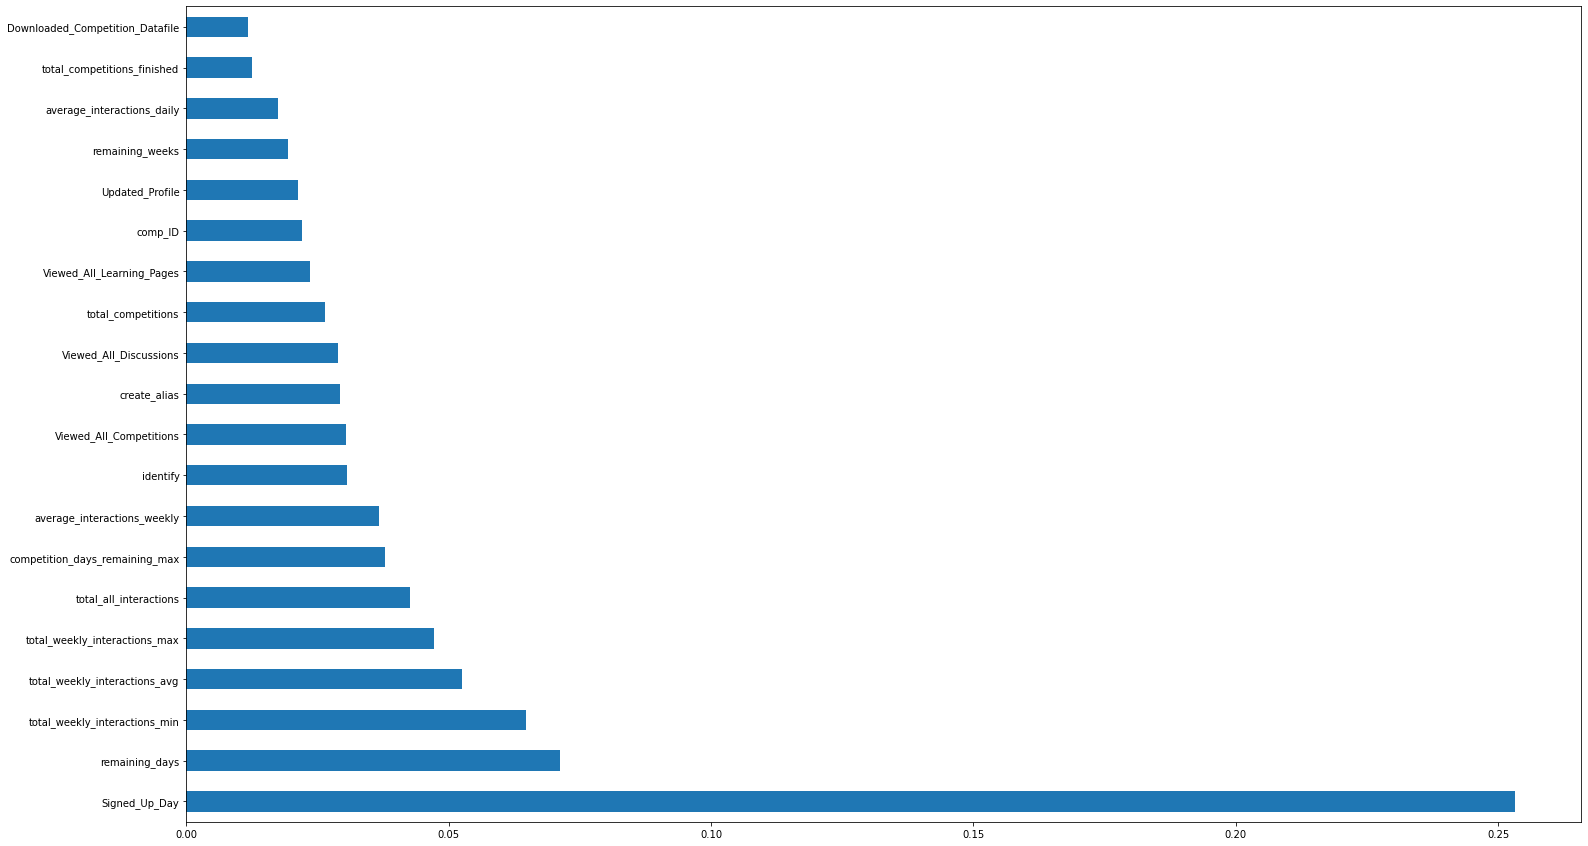

In [ ]:
def check_similarity(df1, df2, train_columns):
  from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  import matplotlib.pyplot as plt

  d1 = df1.copy()
  d2 = df2.copy()
  d1['source'] = 0
  d2['source'] = 1
  joint_df = pd.concat([d1,d2])
  X = joint_df[train_columns]
  y = joint_df['source']
  print(y.value_counts())
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)
  model= RandomForestClassifier(max_depth=15, n_estimators=100, random_state=12)
  model.fit(train_X,train_y)
  print('accuracy is {}'.format(accuracy_score(model.predict(test_X),test_y)))
  print('f1 score  is {}'.format(f1_score(model.predict(test_X),test_y)))
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.nlargest(20).plot(kind='barh')
  plt.show()

check_similarity(train_df, test_df, train_df.columns.difference([
  'User_ID', 'Active',
  # 'Signed_Up_month_4', 'badge_OCZE_month_4', 'create_alias_month_4',
  # 'Confirmed_Email_month_4', 'Viewed_All_Discussions_month_4', 'Viewed_All_Competitions_month_4',
  # 'Viewed_All_Learning_Pages_month_4', 'Updated_Profile_month_4', 'identify_month_4', 'comp_ID_month_4',
  # 'Joined_Competition_month_4', 'Downloaded_Competition_Datafile_month_4', 'Created At Month',
]))

In [ ]:
train_df

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
0,ID_DC6S4E9O,-0.548460,0.387721,0.644385,-0.697524,-1.409040,1.481146,0.795552,0.550335,0.377592,...,11,11,11,14.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881
1,ID_QZ1HASL3,-0.548460,-0.222042,0.644385,-0.697524,1.516928,0.095120,0.795552,0.550335,0.377592,...,20,1,10,28.0,4.0,21.0,-0.894210,-0.117340,-0.215626,-0.552881
2,ID_W942LN7F,1.929088,1.651340,0.644385,1.392517,1.636776,2.124794,0.795552,0.550335,0.377592,...,49,2,20,14.0,2.0,62.0,1.281624,1.270772,-0.215626,1.502904
3,ID_XAXET461,-0.548460,1.983073,0.644385,1.392517,1.636776,1.191526,0.795552,0.550335,0.377592,...,34,14,24,3.0,1.0,48.0,1.738866,1.629659,-0.215626,1.502904
4,ID_9LMT6576,-0.548460,1.466834,0.644385,-0.697524,1.769642,2.008358,0.795552,0.550335,0.377592,...,44,44,44,30.0,4.0,44.0,0.418972,0.453239,4.637653,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,10,10,10,16.0,2.0,10.0,-0.894210,-0.117340,-0.215626,-0.552881
7143,ID_FP1ICZ2P,-0.548460,0.756196,0.644385,-0.697524,-0.164285,1.869114,0.795552,0.550335,0.377592,...,28,3,15,30.0,4.0,31.0,0.418972,0.118756,-0.215626,-0.552881
7144,ID_V0216AT7,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,0.550335,0.377592,...,2,1,1,0.0,0.0,3.0,-0.894210,-1.565236,-0.215626,-0.552881
7145,ID_C5393PD0,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881


In [ ]:
test_df

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,identify,...,total_weekly_interactions_max,total_weekly_interactions_min,total_weekly_interactions_avg,remaining_days,remaining_weeks,total_all_interactions,average_interactions_daily,average_interactions_weekly,total_job_interactions,competition_days_remaining_max
7147,ID_SOSYQMR1,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
7148,ID_2EIVAHU0,1.896546,-0.222042,0.644385,1.392517,0.390662,0.095120,0.795552,0.550335,-1.358023,...,55,55,55,15.0,2.0,55.0,1.130846,1.158767,-0.215626,-0.552881
7149,ID_PANFDU5H,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,2.157939
7150,ID_XTEGR72A,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
7151,ID_S7FSK0H4,-0.548460,-0.222042,0.644385,-0.697524,-1.409040,-1.376546,0.795552,-1.405301,-1.358023,...,6,2,4,16.0,2.0,8.0,-0.894210,-0.266446,-0.215626,-0.552881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,ID_O7K125TA,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8511,ID_42XELPAK,-0.548460,-1.568652,-1.306712,-0.697524,-1.409040,-1.376546,-1.135541,-1.405301,-1.358023,...,0,0,0,0.0,0.0,0.0,-0.894210,-1.565236,-0.215626,-0.552881
8512,ID_8NJZZBI2,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,13,13,13,24.0,3.0,13.0,-0.894210,-0.266446,-0.215626,-0.552881
8513,ID_IDVLFCHW,-0.548460,-0.222042,0.644385,-0.697524,-0.164285,0.095120,0.795552,0.550335,0.377592,...,11,11,11,17.0,2.0,11.0,-0.894210,-0.117340,-0.215626,-0.552881


In [ ]:
le = LabelEncoder()

Users.Countries_ID = Users.Countries_ID.fillna('unspecified')
Users.Countries_ID = le.fit_transform(Users.Countries_ID)
Users

,FeatureX,FeatureY,User_ID,Countries_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month
0,0,0,ID_DC6S4E9O,135,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,135,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,135,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,135,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,135,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,23,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,81,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,98,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,14,06:56:02.570173,1,5,27


In [ ]:
users_features = pd.get_dummies(Users, columns=['FeatureX', 'FeatureY', 'Countries_ID'], drop_first=False)
# users_features = pd.get_dummies(Users, columns=['FeatureX', 'FeatureY'], drop_first=False)

users_features

,User_ID,Created_At_time,Created_At_Year,Created_At_Month,Created_At_Day_of_month,FeatureX_0,FeatureX_1,FeatureY_0,FeatureY_1,FeatureY_3,...,Countries_ID_137,Countries_ID_138,Countries_ID_139,Countries_ID_140,Countries_ID_141,Countries_ID_142,Countries_ID_143,Countries_ID_144,Countries_ID_145,Countries_ID_146
0,ID_DC6S4E9O,19:33:13.663391,1,1,16,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_E8S97OUT,22:18:18.228921,1,12,27,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_QZ1HASL3,23:13:03.266635,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_SDV9Q3E9,09:50:09.697573,1,12,27,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_W942LN7F,13:33:06.531662,1,1,16,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,ID_C5393PD0,05:02:39.352427,1,11,6,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12409,ID_QX7XRT0C,02:50:19.027320,1,3,25,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12410,ID_RGN2RK66,22:06:33.713692,1,12,7,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12411,ID_XZS1QE0W,06:56:02.570173,1,5,27,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_features = users_features.drop(columns=['Created_At_time', 'Created_At_Year', 'Created_At_Month', 'Created_At_Day_of_month'])
# users_features = users_features.drop(columns=['Created_At_time', 'Created_At_Year', 'Created_At_Month', 'Created_At_Day_of_month', 'Countries_ID'])

users_features

,User_ID,FeatureX_0,FeatureX_1,FeatureY_0,FeatureY_1,FeatureY_3,Countries_ID_0,Countries_ID_1,Countries_ID_2,Countries_ID_3,...,Countries_ID_137,Countries_ID_138,Countries_ID_139,Countries_ID_140,Countries_ID_141,Countries_ID_142,Countries_ID_143,Countries_ID_144,Countries_ID_145,Countries_ID_146
0,ID_DC6S4E9O,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_E8S97OUT,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_QZ1HASL3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_SDV9Q3E9,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_W942LN7F,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,ID_C5393PD0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12409,ID_QX7XRT0C,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12410,ID_RGN2RK66,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12411,ID_XZS1QE0W,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Select relevant features

In [ ]:
new_test = new_test[features]

features.append('Active')

new_train = new_train[features]

new_train = new_train.merge(users_features, on='User_ID', how='left').fillna(0)
new_test = new_test.merge(users_features, on='User_ID', how='left').fillna(0)

new_train = new_train.merge(user_competition_features.drop(columns='Competition_ID'), on='User_ID', how='left').fillna(0)
new_test = new_test.merge(user_competition_features.drop(columns='Competition_ID'), on='User_ID', how='left').fillna(0)

train_df = new_train.reset_index(drop=True)
test_df = new_test.reset_index(drop=True)

In [ ]:
train_df

,User_ID,total_blog_interactions,total_job_interactions,average_interactions_daily,average_interactions_weekly,total_competitions_ongoing,total_competitions_finished,total_submissions_finished_count,total_submissions_ongoing_count,total_discussions_finished_competition,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,ID_DC6S4E9O,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_QZ1HASL3,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_W942LN7F,4.057159,-0.215626,1.281624,1.270772,1.778707,-0.522376,-0.219997,4.669556,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_XAXET461,-0.246477,-0.215626,1.738866,1.629659,1.778707,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ID_9LMT6576,-0.246477,4.637653,0.418972,0.453239,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7143,ID_FP1ICZ2P,4.057178,-0.215626,0.418972,0.118756,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,ID_V0216AT7,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7145,ID_C5393PD0,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# new_train.hist()
# pyplot.show()

In [ ]:
new_train

,User_ID,total_blog_interactions,total_job_interactions,average_interactions_daily,average_interactions_weekly,total_competitions_ongoing,total_competitions_finished,total_submissions_finished_count,total_submissions_ongoing_count,total_discussions_finished_competition,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,ID_DC6S4E9O,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_QZ1HASL3,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_W942LN7F,4.057159,-0.215626,1.281624,1.270772,1.778707,-0.522376,-0.219997,4.669556,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_XAXET461,-0.246477,-0.215626,1.738866,1.629659,1.778707,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ID_9LMT6576,-0.246477,4.637653,0.418972,0.453239,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7143,ID_FP1ICZ2P,4.057178,-0.215626,0.418972,0.118756,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,ID_V0216AT7,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7145,ID_C5393PD0,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_train.describe()

,total_blog_interactions,total_job_interactions,average_interactions_daily,average_interactions_weekly,total_competitions_ongoing,total_competitions_finished,total_submissions_finished_count,total_submissions_ongoing_count,total_discussions_finished_competition,total_discussions_ongoing_competition,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
count,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,7147.000000,...,7147.000000,7147.0,7147.0,7147.000000,7147.0,7147.0,7147.000000,7147.000000,7147.000000,7147.000000
mean,0.022689,-0.001721,0.082759,0.085465,0.017690,0.017461,-0.025963,0.003144,0.007078,-0.001847,...,0.002519,0.0,0.0,0.001399,0.0,0.0,0.019589,0.004058,0.021548,0.139499
std,1.042159,0.996256,1.007282,0.932003,1.010666,1.011785,0.941884,1.007044,1.028911,0.991414,...,0.050125,0.0,0.0,0.037382,0.0,0.0,0.138592,0.063575,0.145211,0.346491
min,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,-0.105981,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,-0.246477,-0.215626,-0.894210,-0.448385,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,-0.105981,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,-0.246477,-0.215626,0.418972,0.215711,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,-0.105981,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,-0.246477,-0.215626,0.886999,0.638183,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,-0.105981,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,4.057178,4.637653,1.947133,3.682659,1.860231,1.961954,4.545509,4.669556,8.392244,9.435637,...,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_cols = train_df.columns.difference(['User_ID', 'Active'])
X = train_df[main_cols]
y = train_df['Active'].astype(int)
test = test_df[main_cols]

In [ ]:
X

,Confirmed_Email,Countries_ID_0,Countries_ID_1,Countries_ID_10,Countries_ID_100,Countries_ID_101,Countries_ID_102,Countries_ID_103,Countries_ID_104,Countries_ID_105,...,total_comments_finished_competition,total_comments_ongoing_competition,total_competitions_finished,total_competitions_ongoing,total_discussions_finished_competition,total_discussions_general,total_discussions_ongoing_competition,total_job_interactions,total_submissions_finished_count,total_submissions_ongoing_count
0,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
1,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
2,1.0,0,0,0,0,0,0,0,0,0,...,11.399761,-0.044394,-0.522376,1.778707,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,4.669556
3,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,1.778707,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
4,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,4.637653,-0.219997,-0.214153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
7143,1.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
7144,0.0,0,0,0,0,0,0,0,1,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153
7145,0.0,0,0,0,0,0,0,0,0,0,...,-0.087721,-0.044394,-0.522376,-0.558820,-0.119158,-0.223158,-0.105981,-0.215626,-0.219997,-0.214153


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier, Pool

In [ ]:
model = CatBoostClassifier(
    n_estimators=10000,
    learning_rate=0.005,
    auto_class_weights='Balanced',
    # scale_pos_weight=5
)

skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
oof = np.zeros(len(train_df))
predictions = []

# for fold, (trn_idx, val_idx) in enumerate(skfold.split(X, y)):
for fold, (trn_idx, val_idx) in enumerate(skfold.split(X, y)):
    print(f'Fold {fold + 1}')
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]

    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=100,
        early_stopping_rounds=100,
    )

    oof[val_idx] = model.predict(X_valid)
    # predictions.append(model.predict_proba(test)[:, 1])
    predictions.append(model.predict_proba(test)[:, 1])

predictions = np.mean(predictions, axis=0)
print(f'Our oof f1 score is {f1_score(y, oof)}')

Fold 1
0:	learn: 0.6905960	test: 0.6902157	best: 0.6902157 (0)	total: 5.88ms	remaining: 58.8s
100:	learn: 0.5787549	test: 0.5732082	best: 0.5732082 (100)	total: 614ms	remaining: 1m
200:	learn: 0.5486341	test: 0.5428173	best: 0.5428173 (200)	total: 1.19s	remaining: 57.9s
300:	learn: 0.5319729	test: 0.5278733	best: 0.5278733 (300)	total: 1.79s	remaining: 57.7s
400:	learn: 0.5217099	test: 0.5207334	best: 0.5207334 (400)	total: 2.33s	remaining: 55.7s
500:	learn: 0.5128075	test: 0.5170768	best: 0.5170768 (500)	total: 2.87s	remaining: 54.5s
600:	learn: 0.5060925	test: 0.5150254	best: 0.5148940 (588)	total: 3.44s	remaining: 53.7s
700:	learn: 0.5000087	test: 0.5126353	best: 0.5126230 (699)	total: 3.97s	remaining: 52.7s
800:	learn: 0.4929807	test: 0.5112849	best: 0.5110802 (787)	total: 4.54s	remaining: 52.1s
900:	learn: 0.4849186	test: 0.5108698	best: 0.5106166 (878)	total: 5.08s	remaining: 51.3s
1000:	learn: 0.4753697	test: 0.5098246	best: 0.5098129 (994)	total: 5.64s	remaining: 50.7s
1100:	le

In [ ]:
train_df

,User_ID,total_blog_interactions,total_job_interactions,average_interactions_daily,average_interactions_weekly,total_competitions_ongoing,total_competitions_finished,total_submissions_finished_count,total_submissions_ongoing_count,total_discussions_finished_competition,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,ID_DC6S4E9O,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_QZ1HASL3,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_W942LN7F,4.057159,-0.215626,1.281624,1.270772,1.778707,-0.522376,-0.219997,4.669556,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_XAXET461,-0.246477,-0.215626,1.738866,1.629659,1.778707,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ID_9LMT6576,-0.246477,4.637653,0.418972,0.453239,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,ID_XTFXUQVS,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7143,ID_FP1ICZ2P,4.057178,-0.215626,0.418972,0.118756,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,ID_V0216AT7,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7145,ID_C5393PD0,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df

,User_ID,total_blog_interactions,total_job_interactions,average_interactions_daily,average_interactions_weekly,total_competitions_ongoing,total_competitions_finished,total_submissions_finished_count,total_submissions_ongoing_count,total_discussions_finished_competition,...,Country_ID_11,Country_ID_12,Country_ID_13,Country_ID_14,Country_ID_15,Country_ID_16,Country_ID_17,Country_ID_18,Country_ID_19,Country_ID_20
0,ID_SOSYQMR1,-0.246477,-0.215626,-0.894210,-1.565236,1.778707,1.961589,4.545509,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,ID_2EIVAHU0,-0.246477,-0.215626,1.130846,1.158767,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_PANFDU5H,-0.246477,-0.215626,-0.894210,-1.565236,1.778707,1.904486,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,ID_XTEGR72A,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,1.904486,-0.219997,-0.214153,8.392244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_S7FSK0H4,-0.246477,-0.215626,-0.894210,-0.266446,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ID_O7K125TA,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364,ID_42XELPAK,-0.246477,-0.215626,-0.894210,-1.565236,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1365,ID_8NJZZBI2,-0.246477,-0.215626,-0.894210,-0.266446,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366,ID_IDVLFCHW,-0.246477,-0.215626,-0.894210,-0.117340,-0.558820,-0.522376,-0.219997,-0.214153,-0.119158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sub = pd.DataFrame({
    'User_ID_Next_month_Activity': test_df.User_ID,
    'Active': predictions
})
sub.Active.describe()

count    1368.000000
mean        0.257656
std         0.224112
min         0.040106
25%         0.090043
50%         0.153799
75%         0.353292
max         0.970474
Name: Active, dtype: float64

In [ ]:
sub

,User_ID_Next_month_Activity,Active
0,ID_SOSYQMR1,0.080532
1,ID_2EIVAHU0,0.618010
2,ID_PANFDU5H,0.126101
3,ID_XTEGR72A,0.083674
4,ID_S7FSK0H4,0.141745
...,...,...
1363,ID_O7K125TA,0.077799
1364,ID_42XELPAK,0.063978
1365,ID_8NJZZBI2,0.121574
1366,ID_IDVLFCHW,0.190984


In [ ]:
sub.Active = sub.Active.apply(lambda x: 1 if x > 0.5 else 0)
sub.User_ID_Next_month_Activity = sub.User_ID_Next_month_Activity + '_Month_5'
sub

,User_ID_Next_month_Activity,Active
0,ID_SOSYQMR1_Month_5,0
1,ID_2EIVAHU0_Month_5,1
2,ID_PANFDU5H_Month_5,0
3,ID_XTEGR72A_Month_5,0
4,ID_S7FSK0H4_Month_5,0
...,...,...
1363,ID_O7K125TA_Month_5,0
1364,ID_42XELPAK_Month_5,0
1365,ID_8NJZZBI2_Month_5,0
1366,ID_IDVLFCHW_Month_5,0


In [ ]:
sub = sub.drop_duplicates('User_ID_Next_month_Activity')

sub

,User_ID_Next_month_Activity,Active
0,ID_SOSYQMR1_Month_5,0
1,ID_2EIVAHU0_Month_5,1
2,ID_PANFDU5H_Month_5,0
3,ID_XTEGR72A_Month_5,0
4,ID_S7FSK0H4_Month_5,0
...,...,...
1363,ID_O7K125TA_Month_5,0
1364,ID_42XELPAK_Month_5,0
1365,ID_8NJZZBI2_Month_5,0
1366,ID_IDVLFCHW_Month_5,0


In [ ]:
sub = pd.merge(SampleSubmission.drop(columns='Active'), sub, on='User_ID_Next_month_Activity', how='left').fillna(0)
sub.Active.value_counts()

0.0    1105
1.0     235
Name: Active, dtype: int64

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
# import library
from imblearn.under_sampling import TomekLinks
from collections import Counter

undersample = TomekLinks()

# fit predictor and target variable
x_tom, y_tom = undersample.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tom))

Original dataset shape Counter({0: 6028, 1: 1119})
Resample dataset shape Counter({0: 5768, 1: 1119})


In [ ]:
model_balanced_tom = CatBoostClassifier(
    n_estimators=10000,
    learning_rate=0.005,
    auto_class_weights='Balanced',
    # scale_pos_weight=5
)

skfold_balanced_tom = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
oof_balanced_tom = np.zeros(len(y_tom))
predictions_balanced_tom = []

for fold, (trn_idx, val_idx) in enumerate(skfold.split(x_tom, y_tom)):
    print(f'Fold {fold + 1}')
    X_train, y_train = x_tom.iloc[trn_idx], y_tom.iloc[trn_idx]
    X_valid, y_valid = x_tom.iloc[val_idx], y_tom.iloc[val_idx]

    model_balanced_tom.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=100,
        early_stopping_rounds=100,
    )

    oof_balanced_tom[val_idx] = model_balanced_tom.predict(X_valid)
    predictions_balanced_tom.append(model_balanced_tom.predict_proba(test)[:, 1])

predictions_balanced_tom = np.mean(predictions_balanced_tom, axis=0)
print(f'Our oof f1 score is {f1_score(y_tom, oof_balanced_tom)}')

Fold 1
0:	learn: 0.6908345	test: 0.6904845	best: 0.6904845 (0)	total: 6.41ms	remaining: 1m 4s
100:	learn: 0.5739494	test: 0.5574217	best: 0.5574217 (100)	total: 613ms	remaining: 1m
200:	learn: 0.5396582	test: 0.5205181	best: 0.5205181 (200)	total: 1.19s	remaining: 57.8s
300:	learn: 0.5221135	test: 0.5068503	best: 0.5068503 (300)	total: 1.75s	remaining: 56.3s
400:	learn: 0.5117842	test: 0.5003776	best: 0.5003740 (399)	total: 2.3s	remaining: 55s
500:	learn: 0.5038041	test: 0.4969808	best: 0.4969808 (500)	total: 2.86s	remaining: 54.2s
600:	learn: 0.4969347	test: 0.4948667	best: 0.4948667 (600)	total: 3.42s	remaining: 53.5s
700:	learn: 0.4906526	test: 0.4936893	best: 0.4936715 (699)	total: 3.95s	remaining: 52.4s
800:	learn: 0.4834387	test: 0.4915781	best: 0.4915323 (798)	total: 4.5s	remaining: 51.7s
900:	learn: 0.4756901	test: 0.4894875	best: 0.4894583 (893)	total: 5.05s	remaining: 51s
1000:	learn: 0.4662581	test: 0.4881306	best: 0.4880171 (961)	total: 5.63s	remaining: 50.6s
1100:	learn: 0

KeyboardInterrupt: ignored

In [ ]:
# plot model f eature importance

import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model_balanced_tom.feature_importances_, index=X.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

In [ ]:
sub_balanced = pd.DataFrame({
    'User_ID_Next_month_Activity': test_df.User_ID,
    'Active': predictions_balanced_tom
})
sub_balanced.Active.describe()

In [ ]:
sub_balanced

In [ ]:
sub_balanced.Active = sub_balanced.Active.apply(lambda x: 1 if x > 0.5 else 0)
sub_balanced.User_ID_Next_month_Activity = sub_balanced.User_ID_Next_month_Activity + '_Month_5'
sub_balanced

In [ ]:
sub_balanced = sub_balanced.drop_duplicates('User_ID_Next_month_Activity')

sub_balanced

In [ ]:
sub_balanced = pd.merge(SampleSubmission.drop(columns='Active'), sub_balanced, on='User_ID_Next_month_Activity', how='left').fillna(0)
sub_balanced.Active.value_counts()

In [ ]:
sub_balanced.to_csv('submission_balanced.csv', index=False)

In [ ]:
corr_matrix = new_train.corr()

corr_matrix

In [ ]:
corr_matrix.to_csv("corr.csv")

In [ ]:
UserActivity.Title.value_counts()